In [3]:
import keras
import os
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.image as mpimg
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D,Dropout
from keras.layers import Concatenate, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1. loading predict model

In [4]:
model = load_model('predict_model.h5')

## 2. predict vali data

#### 2.1 loading vali data

In [3]:
# Path using Ubuntu
x_vali_path = '../Input/vali-set/'
y_vali_path = '../Input/vali.txt'

In [4]:
y_vali = np.loadtxt(y_vali_path,dtype=bytes)[:,1].astype(float)

#### 2.2 plot vali label distribution

[<matplotlib.text.Text at 0x12cb94cf8>, <matplotlib.text.Text at 0x1424003c8>]

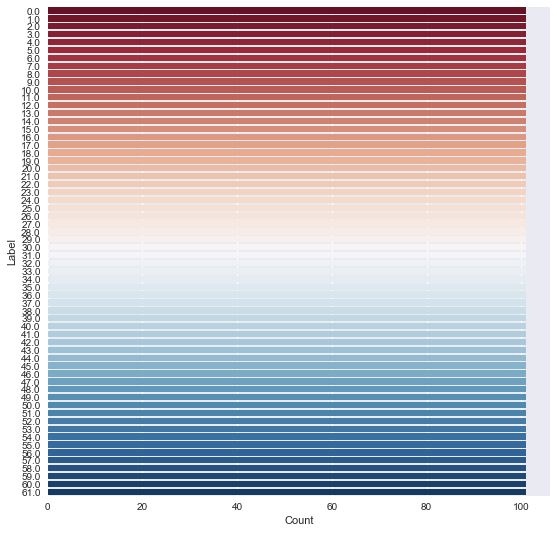

In [5]:
# -------------------------------------------- 
# VISUALISE LABELS AND FREQUENCIES (BAR CHART)
# --------------------------------------------
sns.set_style("whitegrid", {'axes.grid' : True})
plt.figure(figsize=(9,9))
sns.set(style='darkgrid')
ax_label = sns.countplot(y = y_vali, palette="RdBu")
ax_label.set(ylabel = 'Label', xlabel = 'Count')

In [6]:
x_vali=[]
for file in sorted(os.listdir(x_vali_path)):
    x_vali.append(np.expand_dims(mpimg.imread(x_vali_path + file),-1))
x_vali = np.array(x_vali)

#### 2.3 predict data

In [7]:
res = model.predict(x_vali)

In [8]:
pred_label = np.argmax(res,axis=1)

In [9]:
pred_label.shape

(6262,)

#### 2.4 plot predict label distribution

According to this figure, it is distinct that the number of 0 and z(lower) is large

[<matplotlib.text.Text at 0x139a68080>, <matplotlib.text.Text at 0x10e39afd0>]

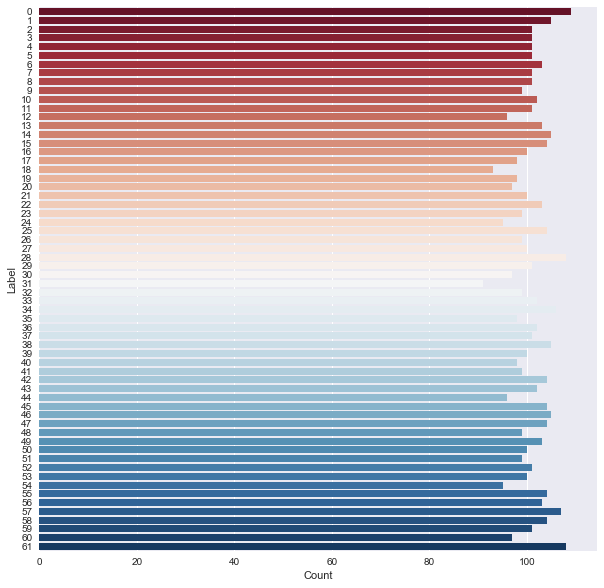

In [10]:
sns.set_style("whitegrid", {'axes.grid' : True})
plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
ax_label = sns.countplot(y = pred_label, palette="RdBu")
ax_label.set(ylabel = 'Label', xlabel = 'Count')

#### 2.5 build confusion matrix

According to the martix, the upper and lower letters are easily confused.

In [11]:
def  build_confusion_matrixbuild_co (testLabel, realLabel):
    CM = confusion_matrix(testLabel, realLabel, labels=np.array(range(62)))
    fig, ax = plt.subplots(figsize=(15,13))
    fig.suptitle("Confusion Matrix", fontsize=20)
    heatmap = ax.pcolor(CM, cmap=plt.cm.Blues)
    ax.set_xticks(np.arange(CM.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(CM.shape[0]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    fig.colorbar(heatmap)
    ax.set_xticklabels(np.array(range(62)), minor=False)
    ax.set_yticklabels(np.array(range(62)), minor=False)
    plt.show()

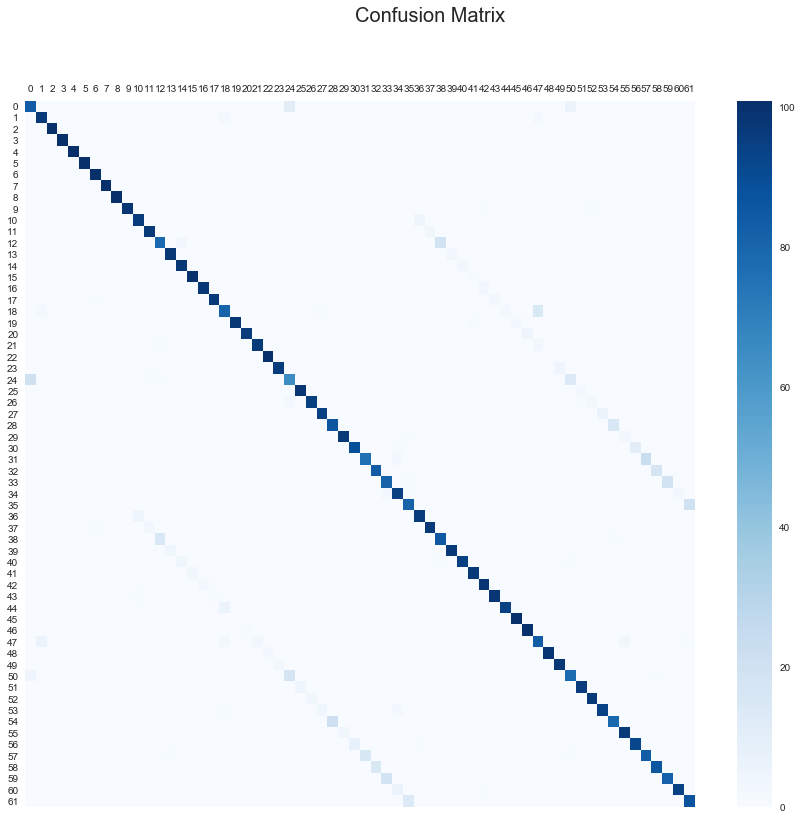

In [12]:
build_confusion_matrixbuild_co (y_vali, pred_label)

#### 2.6 write result file with .txt

In [14]:
# pd.DataFrame(pred_label).to_csv("../Output/predict_vali_label.txt", header=None, index=None, sep=' ')

#### 2.7 list all wrong result

In [15]:
index_false = (y_vali != pred_label)

wrong_image = x_vali[index_false]
wrong_label_real = y_vali[index_false]
wrong_label_predict =  pred_label[index_false]

first_wrong = ((wrong_label_predict == 57) & (wrong_label_real ==  31))
second_wrong = ((wrong_label_predict == 28) & (wrong_label_real ==  54))
thrid_wrong = ((wrong_label_predict == 0) & (wrong_label_real ==  24))

In [16]:
pre_list =[]
for i in range(len(wrong_label_real)):
    pre_list.append(str(wrong_label_real[i])  + '-->' + str(wrong_label_predict[i]))
print(Counter(pre_list))

Counter({'31.0-->57': 23, '54.0-->28': 22, '24.0-->0': 20, '35.0-->61': 20, '12.0-->38': 19, '33.0-->59': 19, '59.0-->33': 19, '32.0-->58': 17, '50.0-->24': 17, '18.0-->47': 15, '28.0-->54': 15, '38.0-->12': 15, '57.0-->31': 15, '58.0-->32': 15, '24.0-->50': 14, '61.0-->35': 14, '0.0-->24': 11, '30.0-->56': 11, '56.0-->30': 8, '0.0-->50': 6, '27.0-->53': 6, '44.0-->18': 6, '47.0-->1': 6, '60.0-->34': 6, '10.0-->36': 5, '20.0-->46': 5, '23.0-->49': 5, '36.0-->10': 5, '50.0-->0': 5, '51.0-->25': 5, '11.0-->37': 4, '39.0-->13': 4, '40.0-->14': 4, '41.0-->15': 4, '47.0-->55': 4, '52.0-->26': 4, '53.0-->27': 4, '55.0-->29': 4, '12.0-->14': 3, '13.0-->39': 3, '14.0-->40': 3, '16.0-->42': 3, '17.0-->43': 3, '21.0-->47': 3, '26.0-->52': 3, '29.0-->55': 3, '34.0-->60': 3, '37.0-->11': 3, '47.0-->18': 3, '47.0-->21': 3, '49.0-->23': 3, '1.0-->18': 2, '1.0-->47': 2, '18.0-->44': 2, '18.0-->1': 2, '19.0-->45': 2, '25.0-->51': 2, '26.0-->24': 2, '31.0-->34': 2, '34.0-->33': 2, '42.0-->16': 2, '48.0

#### 2.8 plot example wrong result

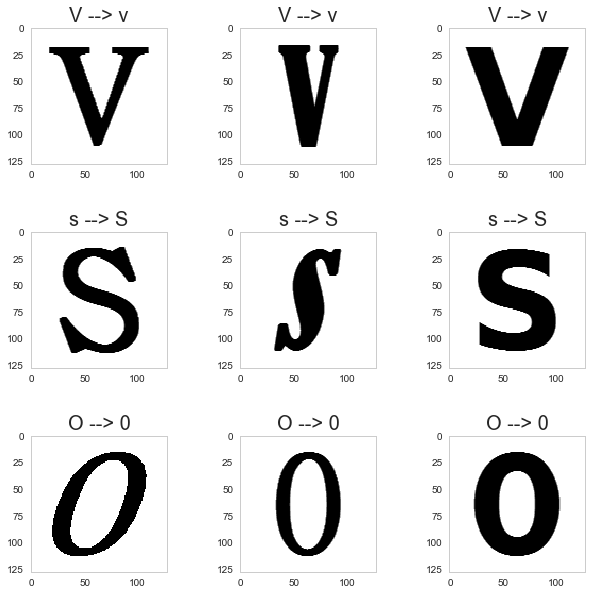

In [17]:
pl_im_vV1 = wrong_image[first_wrong][1].reshape(128,128)
pl_im_vV2 = wrong_image[first_wrong][2].reshape(128,128)
pl_im_vV3 = wrong_image[first_wrong][3].reshape(128,128)

pl_im_Ss1 = wrong_image[second_wrong][1].reshape(128,128)
pl_im_Ss2 = wrong_image[second_wrong][2].reshape(128,128)
pl_im_Ss3 = wrong_image[second_wrong][3].reshape(128,128)

pl_im_0O1 = wrong_image[thrid_wrong][1].reshape(128,128)
pl_im_0O2 = wrong_image[thrid_wrong][2].reshape(128,128)
pl_im_0O3 = wrong_image[thrid_wrong][3].reshape(128,128)


sns.set_style("whitegrid", {'axes.grid' : False})

fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)


##########################
axes.flat[0].set_title("V --> v", fontsize=20)
axes.flat[0].imshow(pl_im_vV1.reshape(128,128),cmap ='gray')

axes.flat[1].set_title("V --> v", fontsize=20)
axes.flat[1].imshow(pl_im_vV2.reshape(128,128),cmap ='gray')

axes.flat[2].set_title("V --> v", fontsize=20)
axes.flat[2].imshow(pl_im_vV3.reshape(128,128),cmap ='gray')

#######################
axes.flat[3].set_title("s --> S", fontsize=20)
axes.flat[3].imshow(pl_im_Ss1.reshape(128,128),cmap ='gray')

axes.flat[4].set_title("s --> S", fontsize=20)
axes.flat[4].imshow(pl_im_Ss2.reshape(128,128),cmap ='gray')

axes.flat[5].set_title("s --> S", fontsize=20)
axes.flat[5].imshow(pl_im_Ss3.reshape(128,128),cmap ='gray')

########################
axes.flat[6].set_title("O --> 0", fontsize=20)
axes.flat[6].imshow(pl_im_0O1.reshape(128,128),cmap ='gray')

axes.flat[7].set_title("O --> 0", fontsize=20)
axes.flat[7].imshow(pl_im_0O2.reshape(128,128),cmap ='gray')

axes.flat[8].set_title("O --> 0", fontsize=20)
axes.flat[8].imshow(pl_im_0O3.reshape(128,128),cmap ='gray')




#### 2.9 plot all wrong results

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


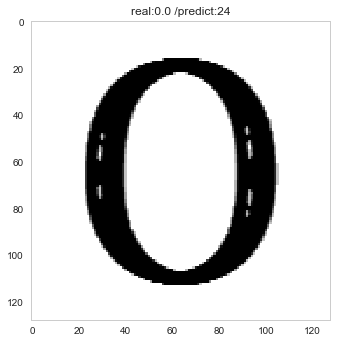

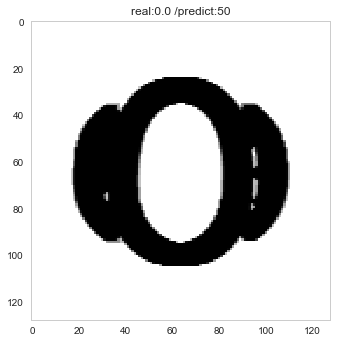

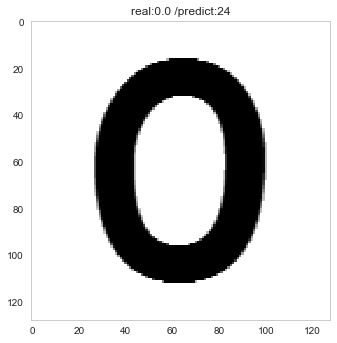

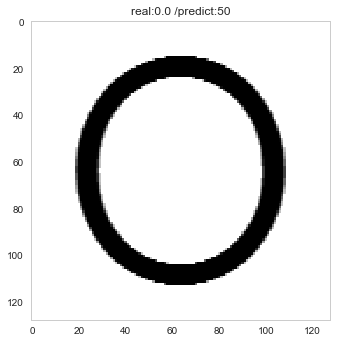

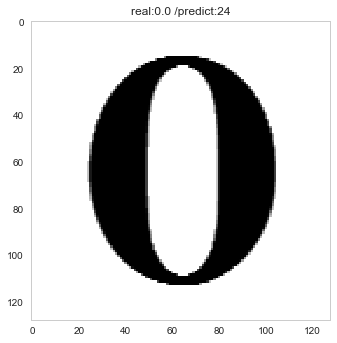

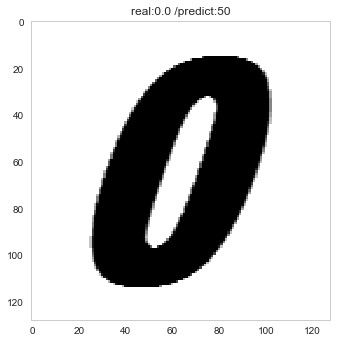

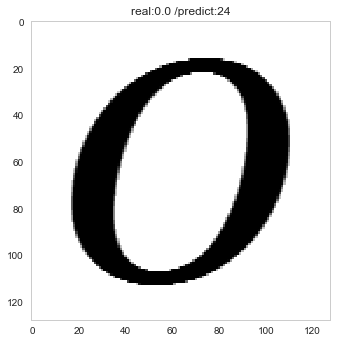

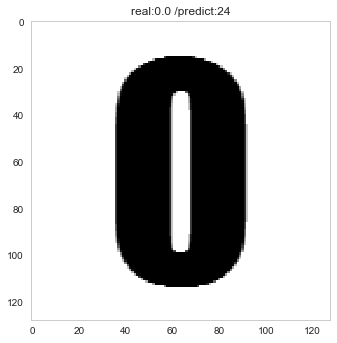

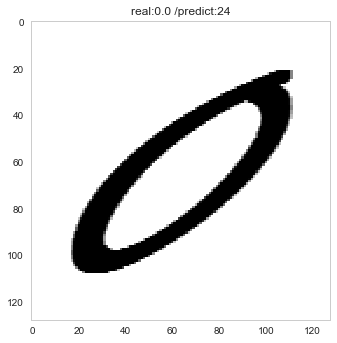

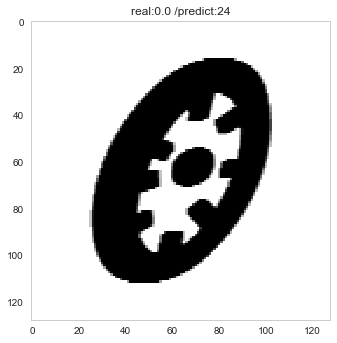

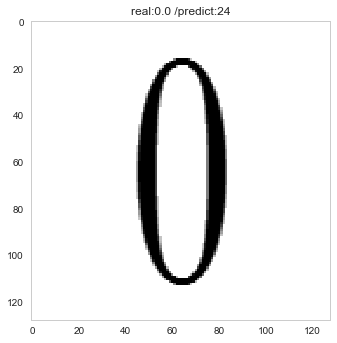

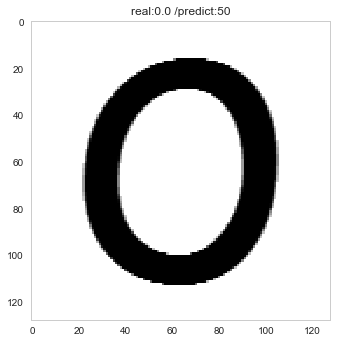

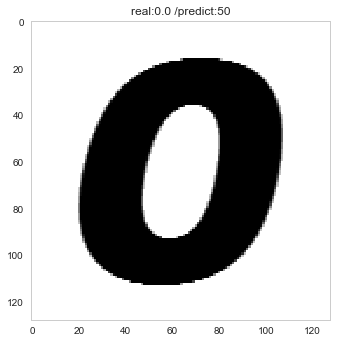

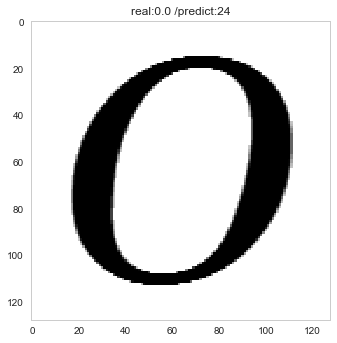

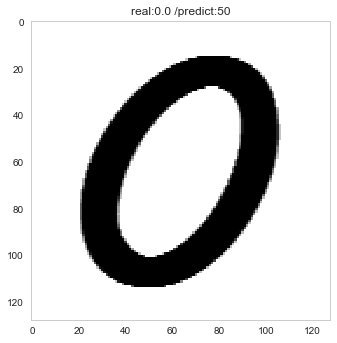

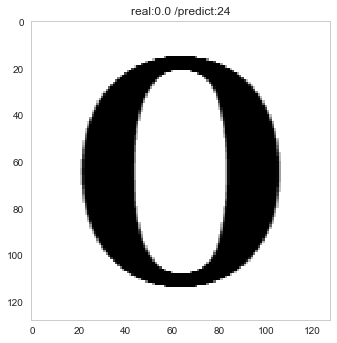

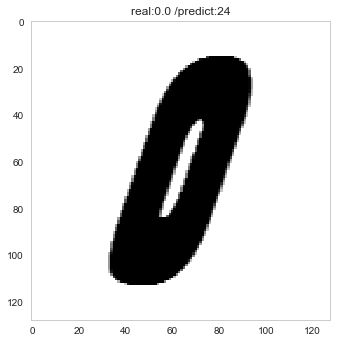

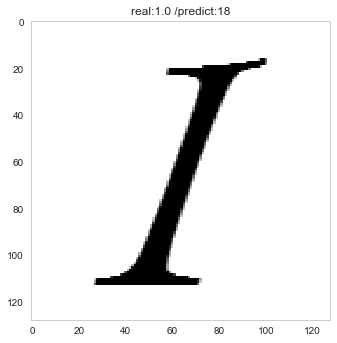

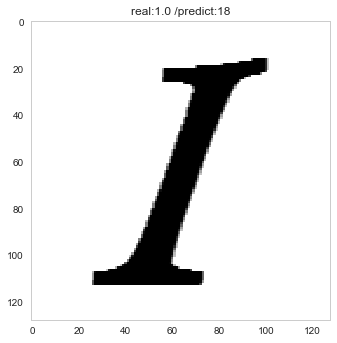

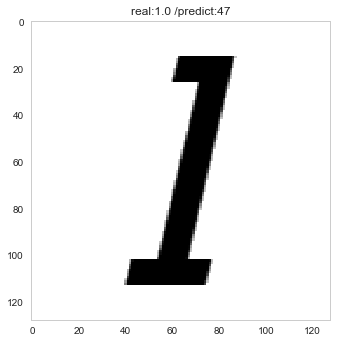

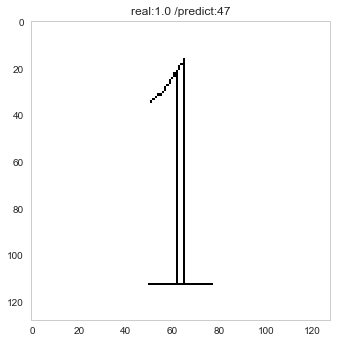

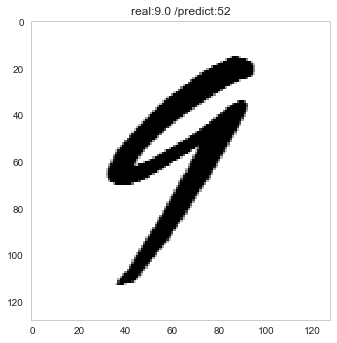

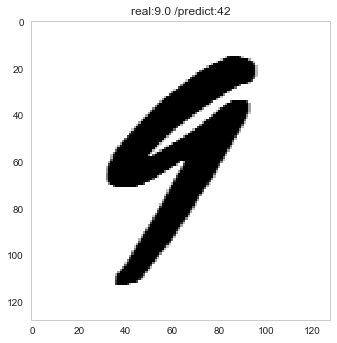

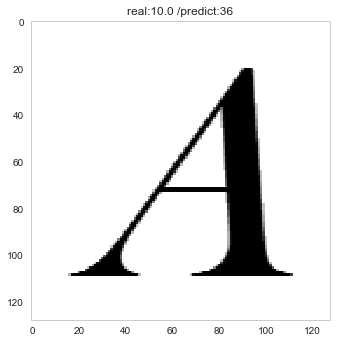

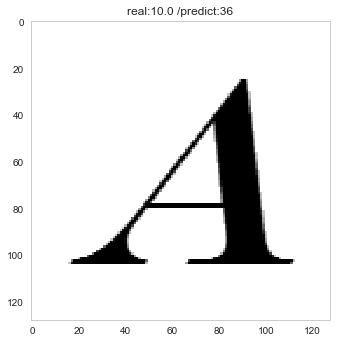

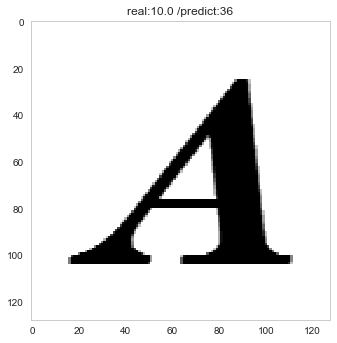

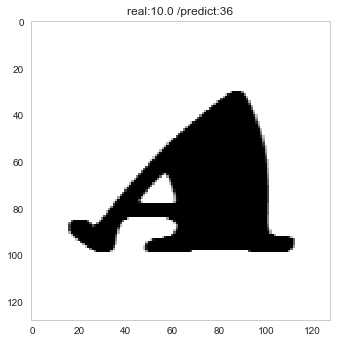

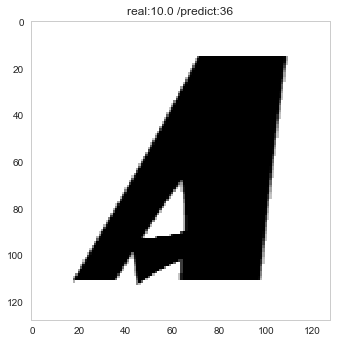

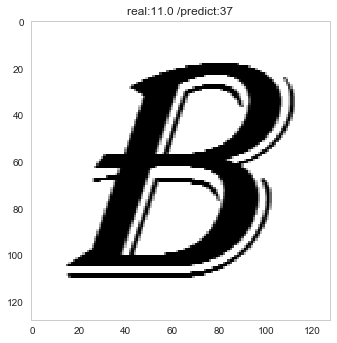

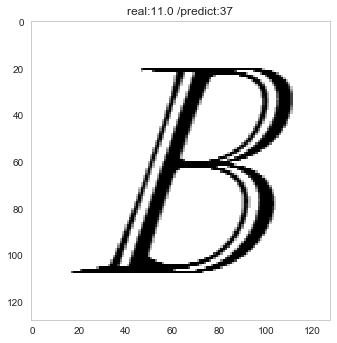

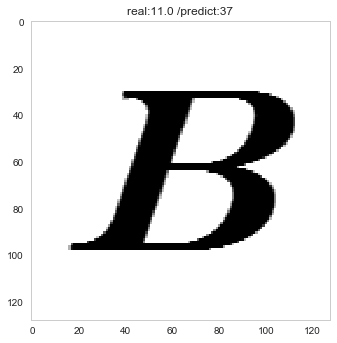

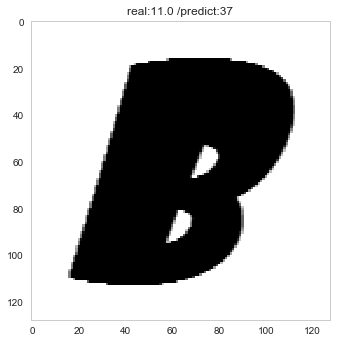

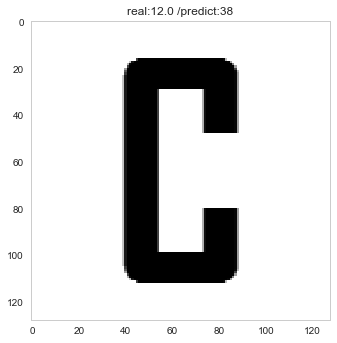

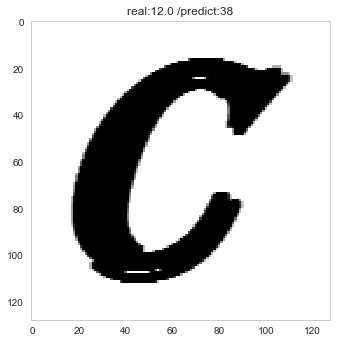

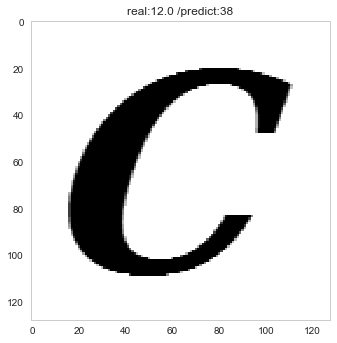

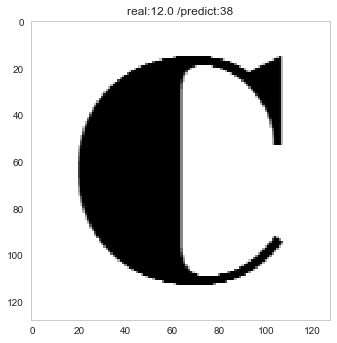

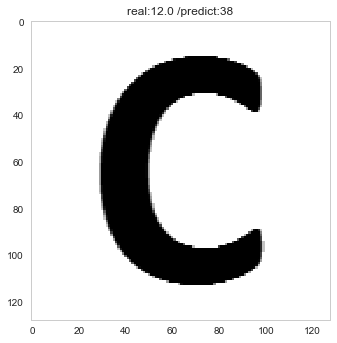

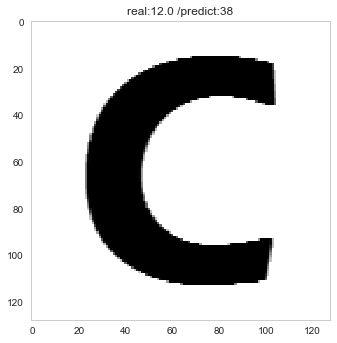

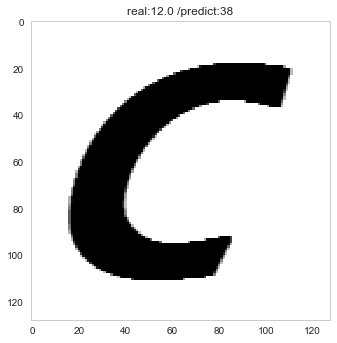

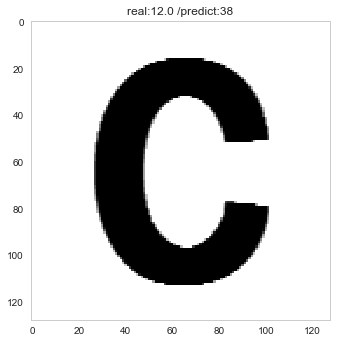

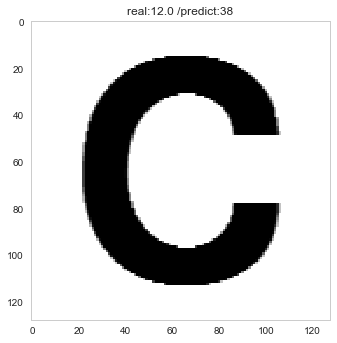

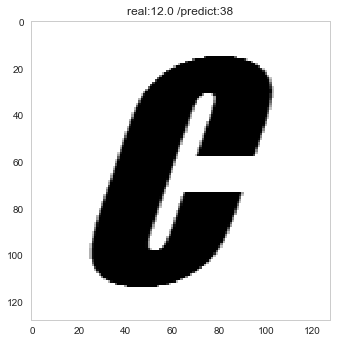

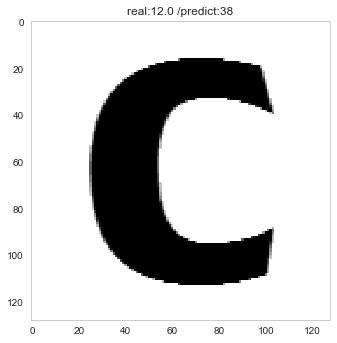

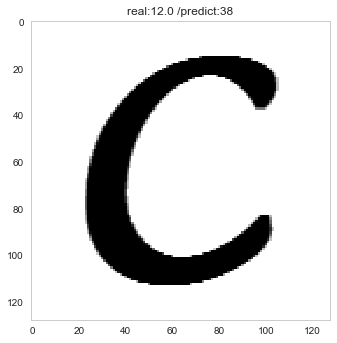

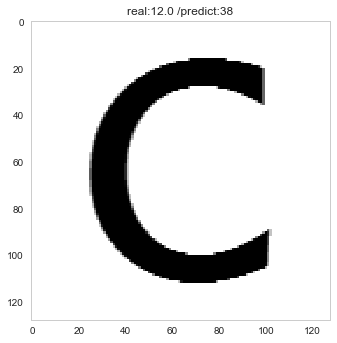

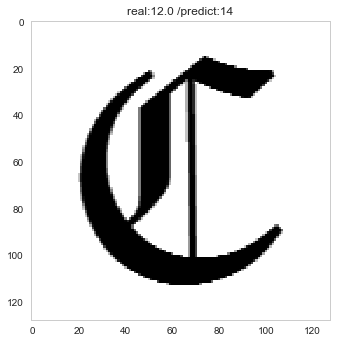

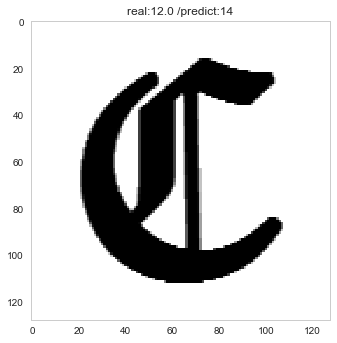

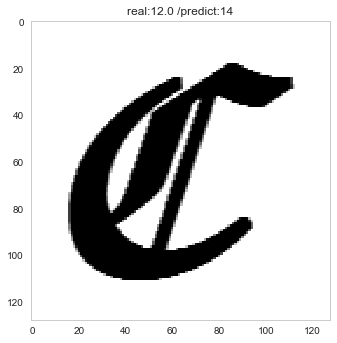

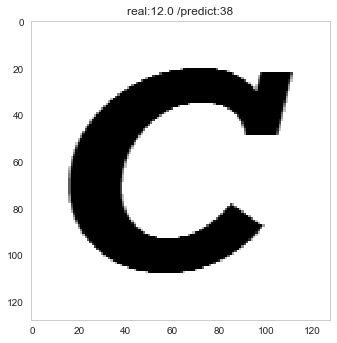

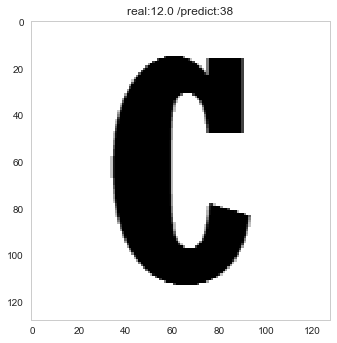

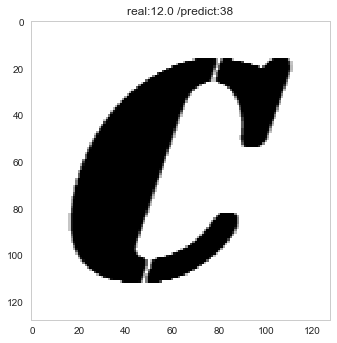

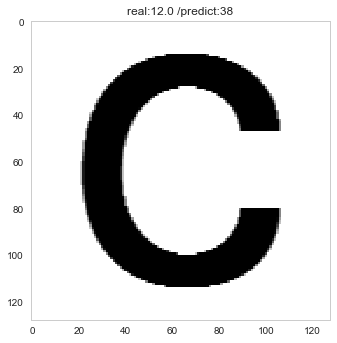

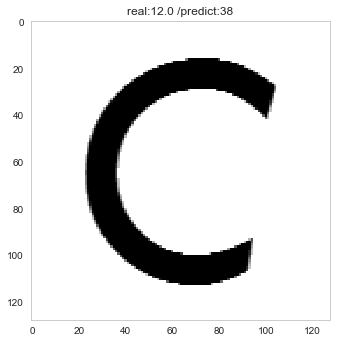

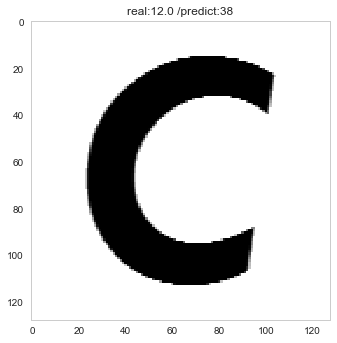

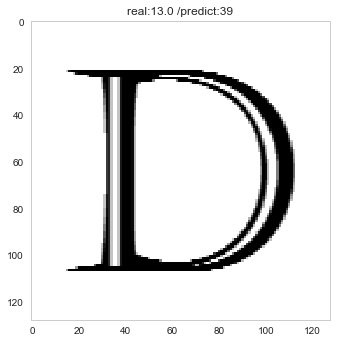

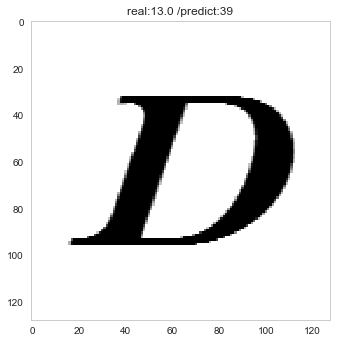

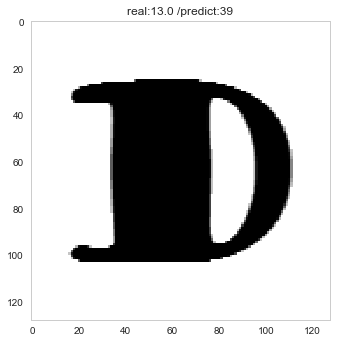

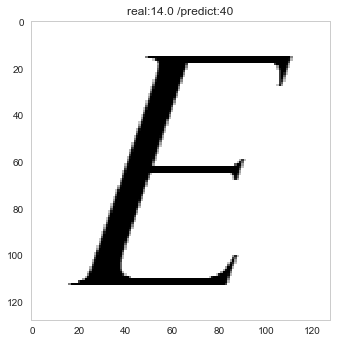

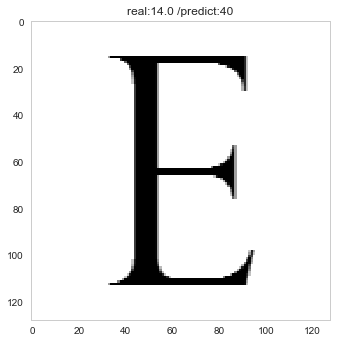

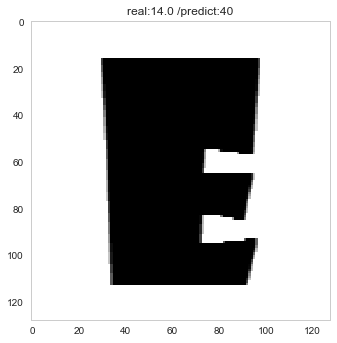

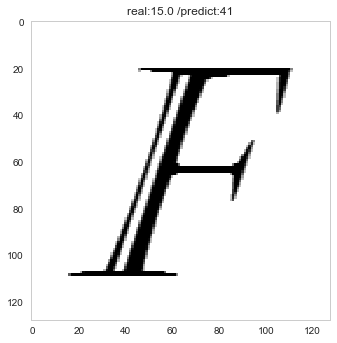

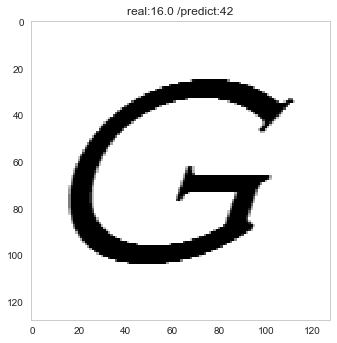

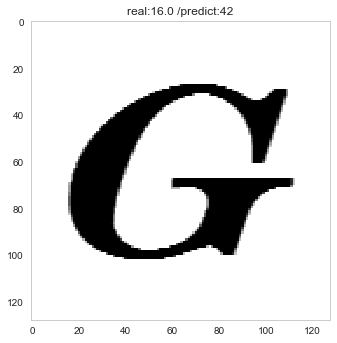

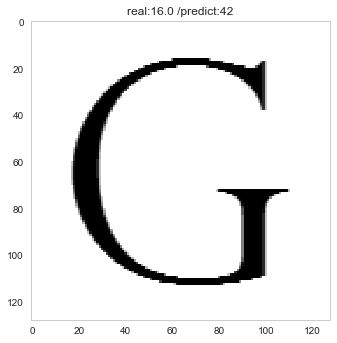

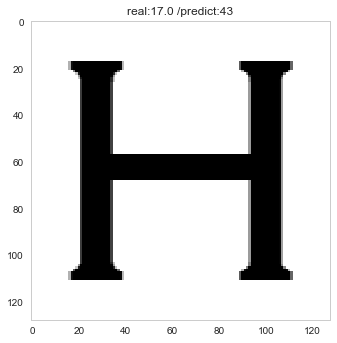

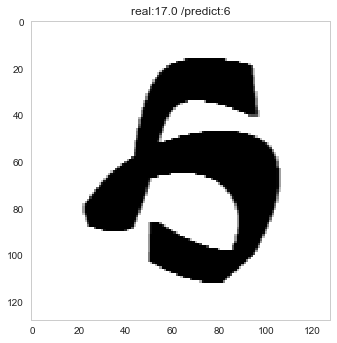

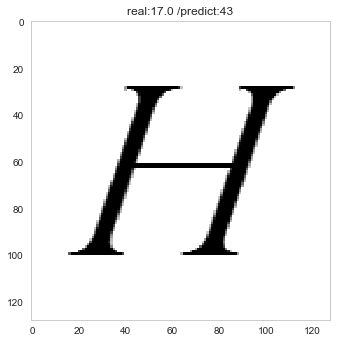

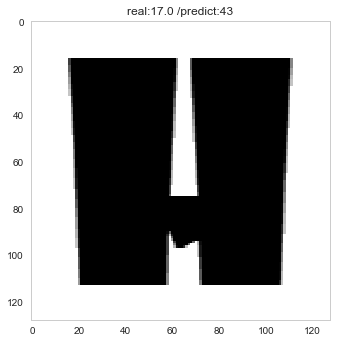

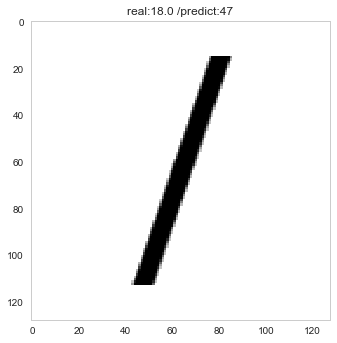

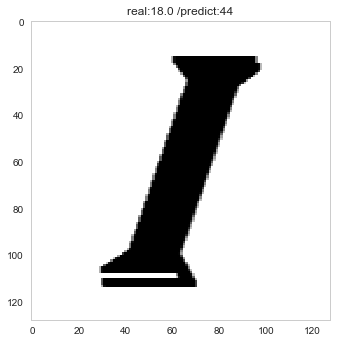

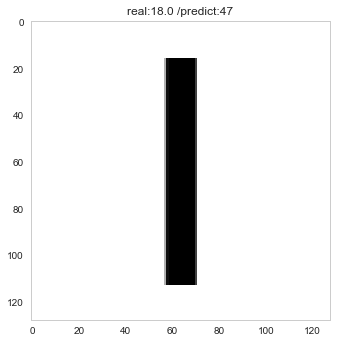

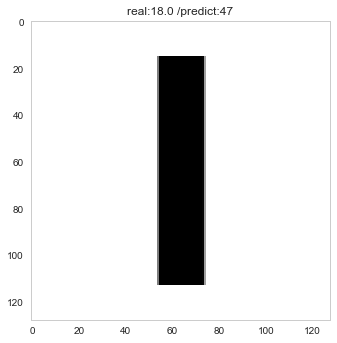

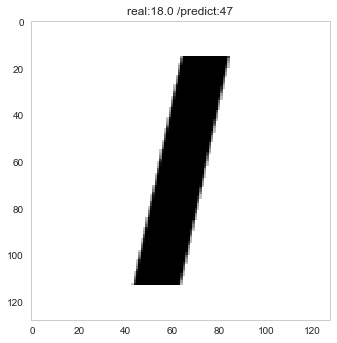

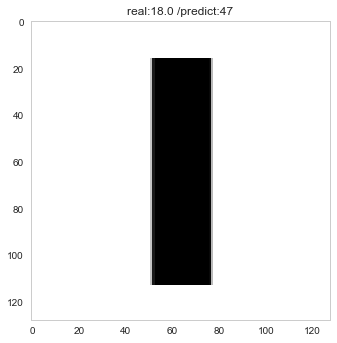

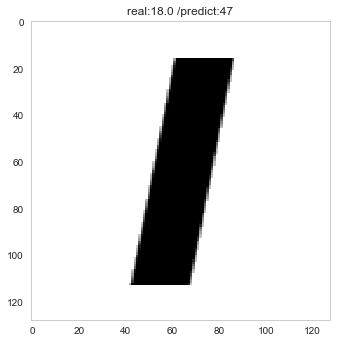

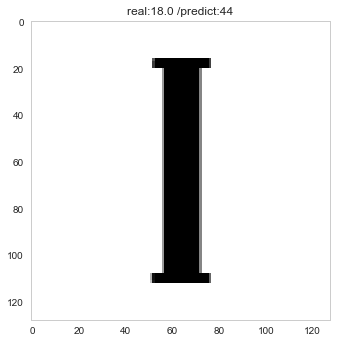

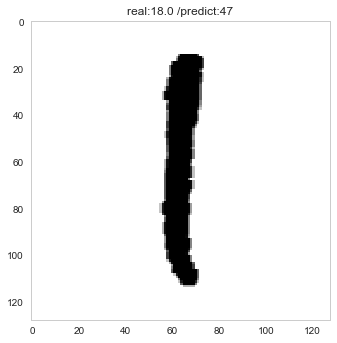

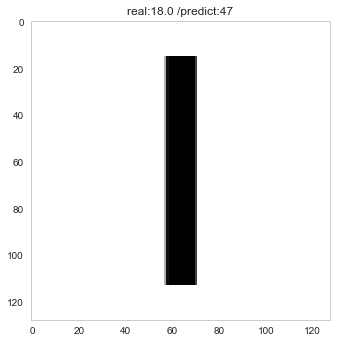

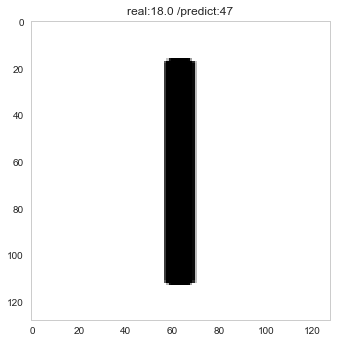

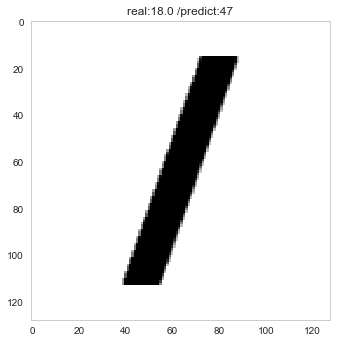

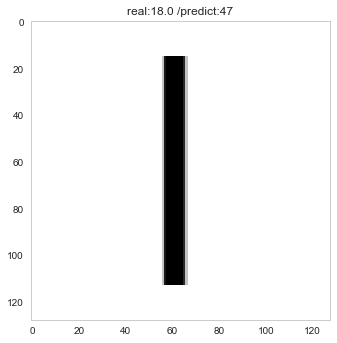

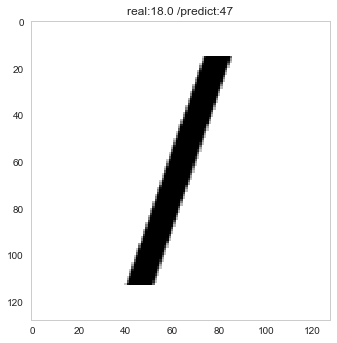

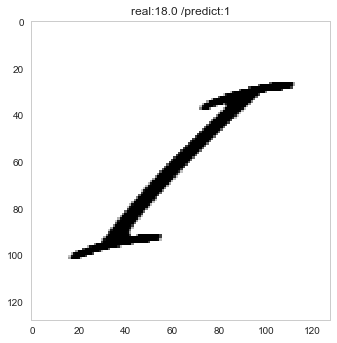

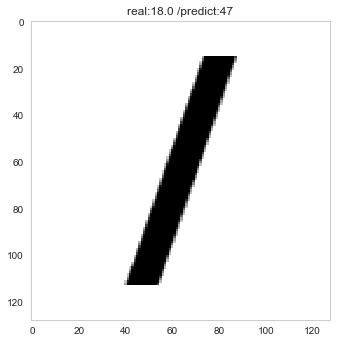

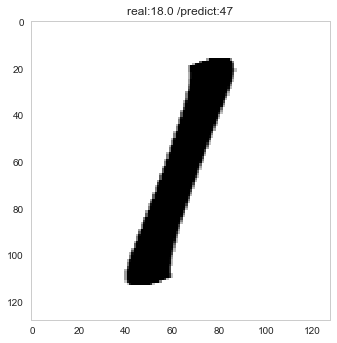

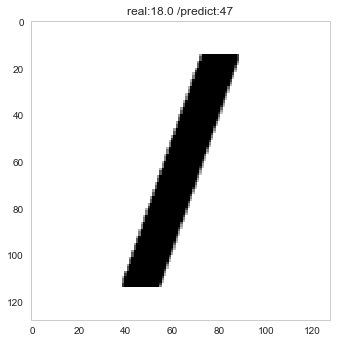

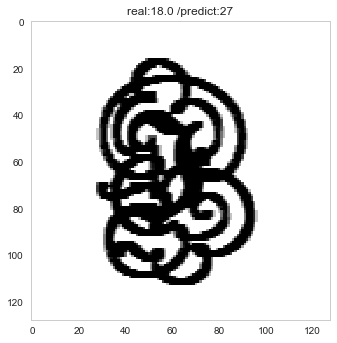

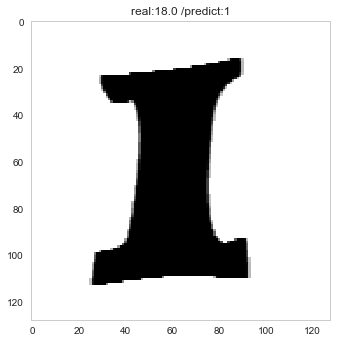

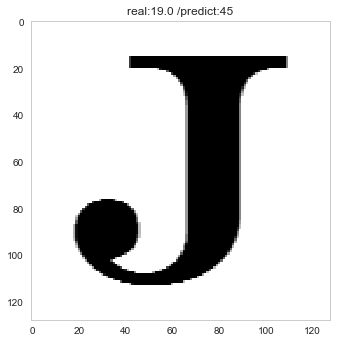

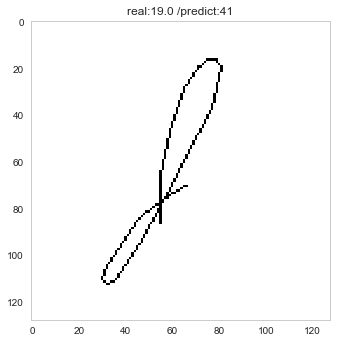

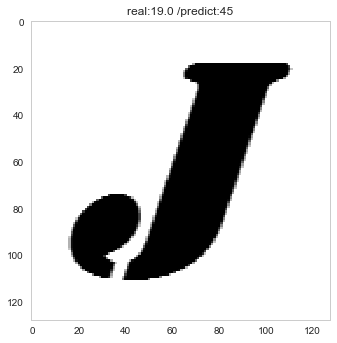

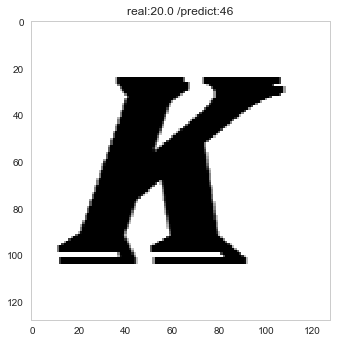

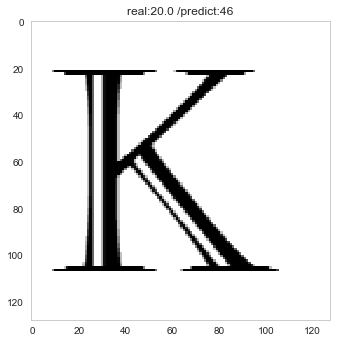

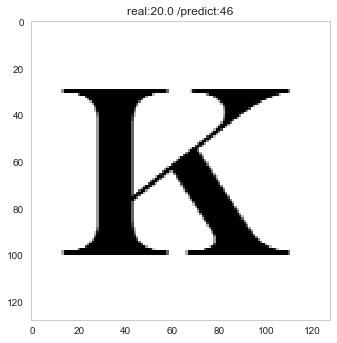

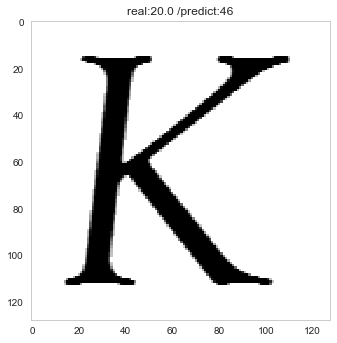

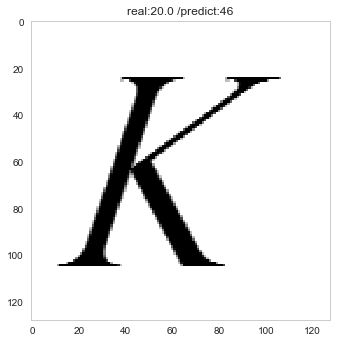

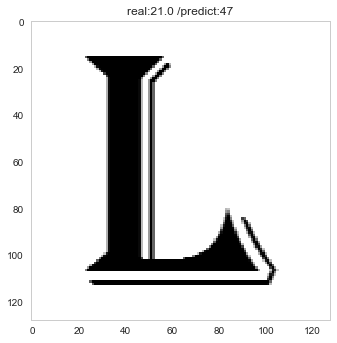

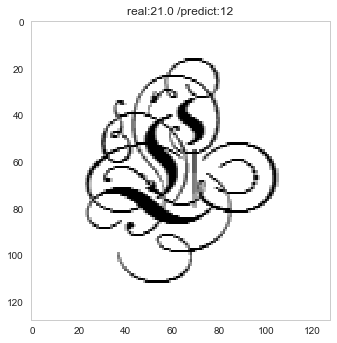

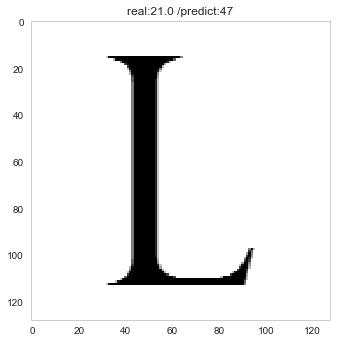

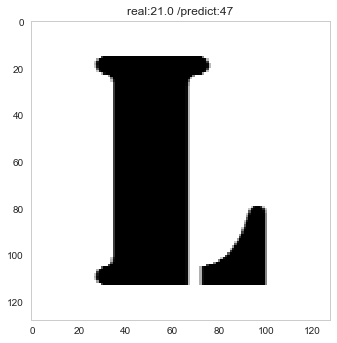

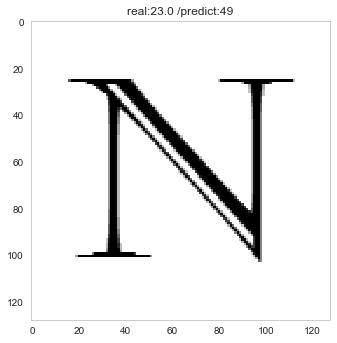

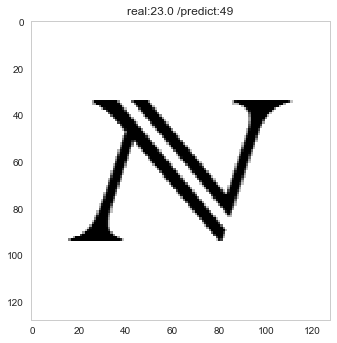

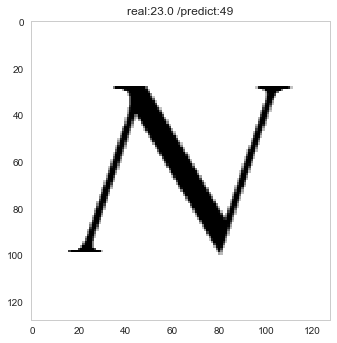

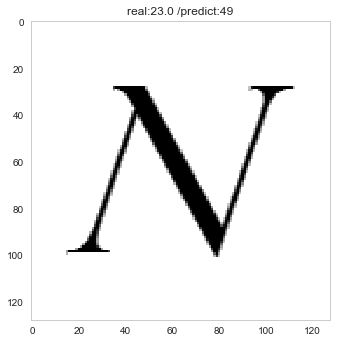

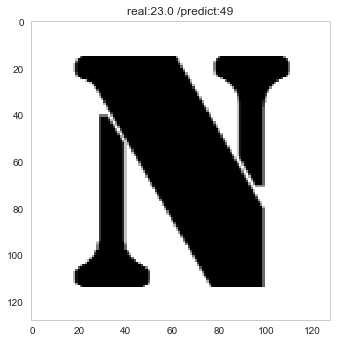

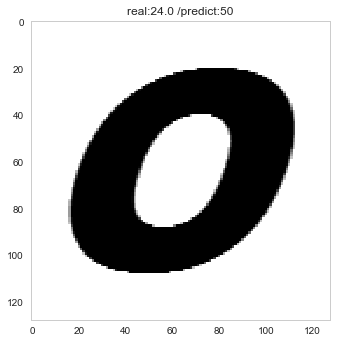

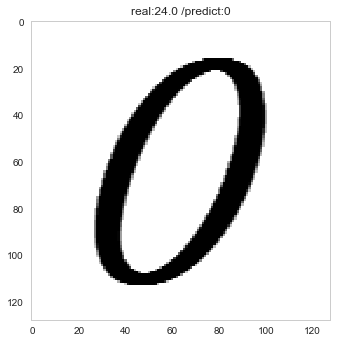

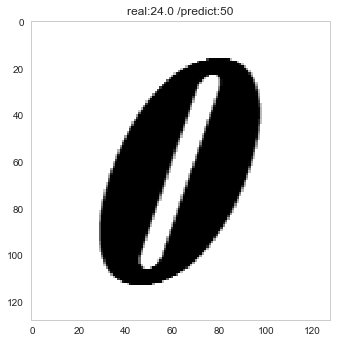

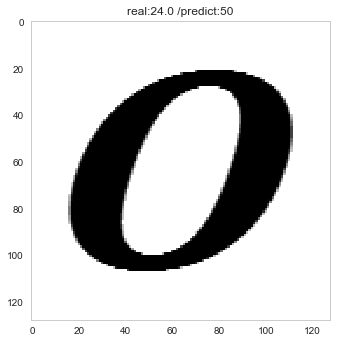

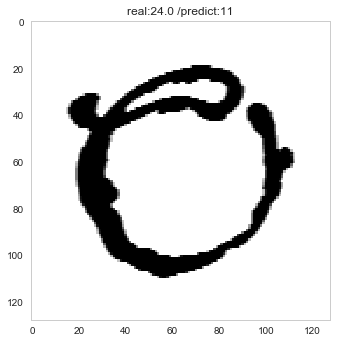

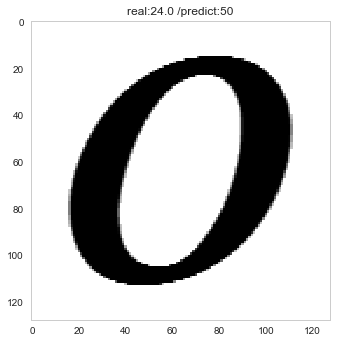

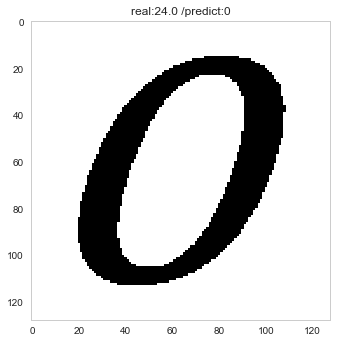

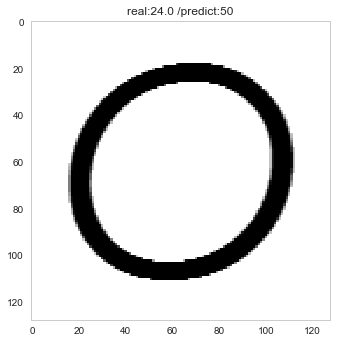

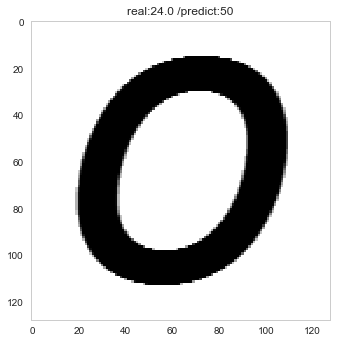

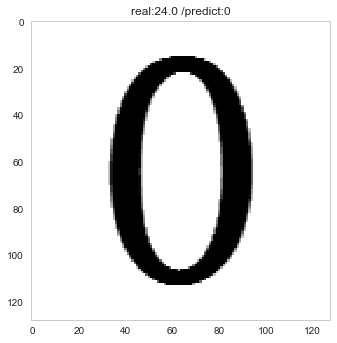

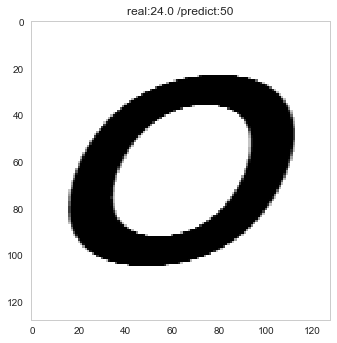

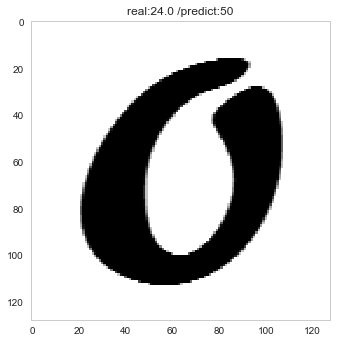

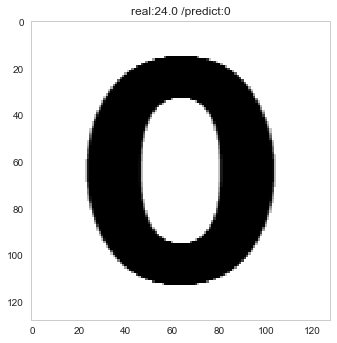

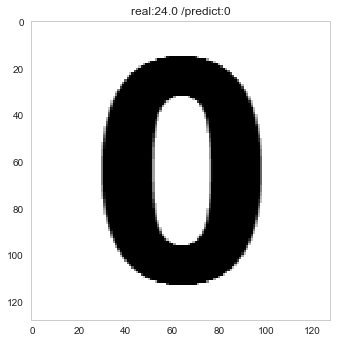

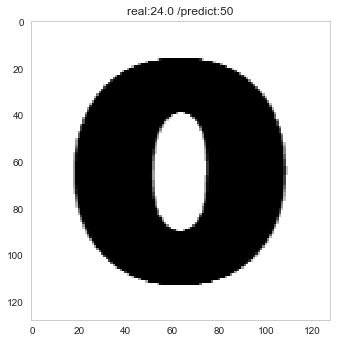

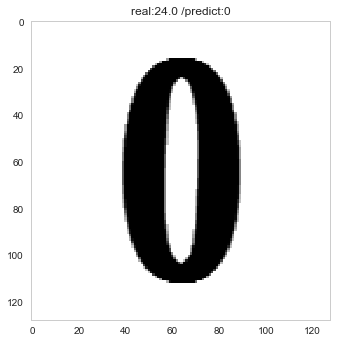

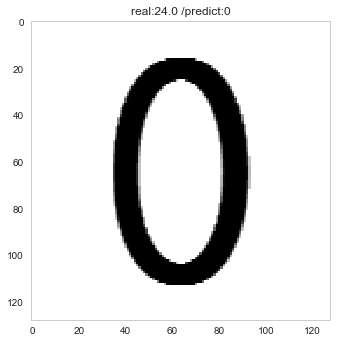

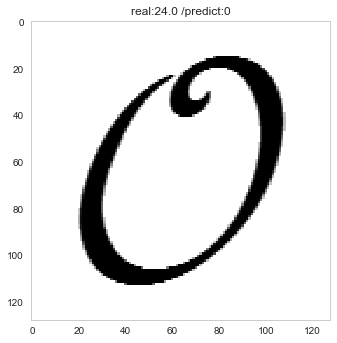

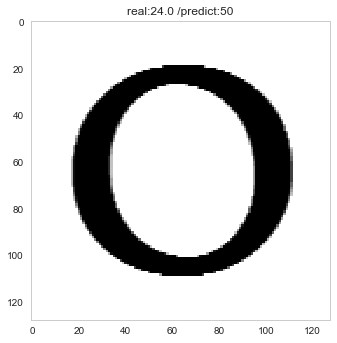

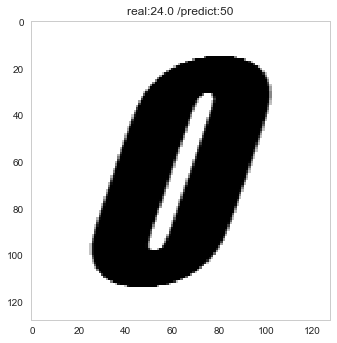

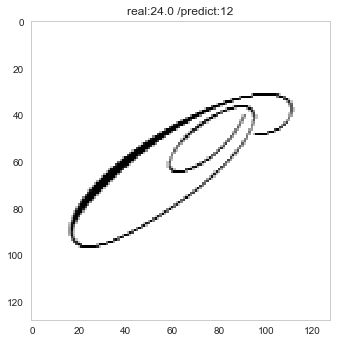

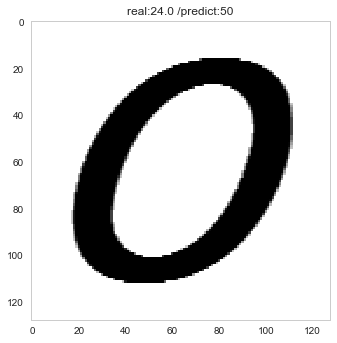

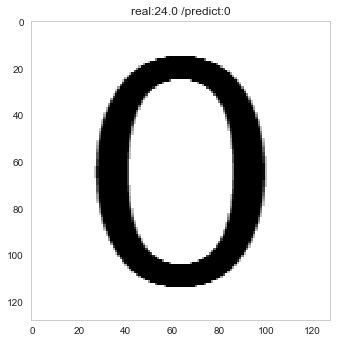

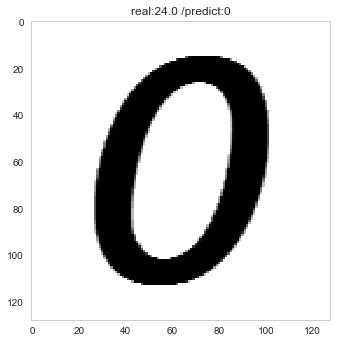

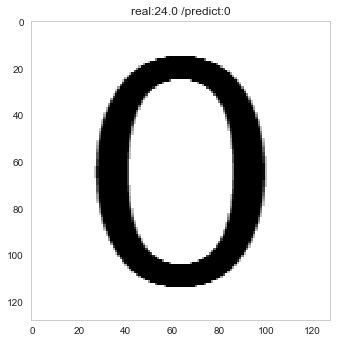

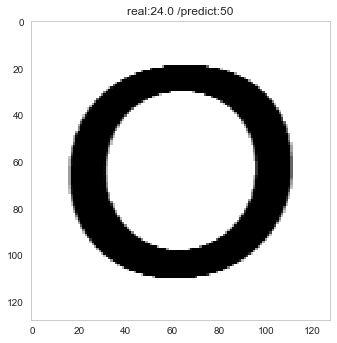

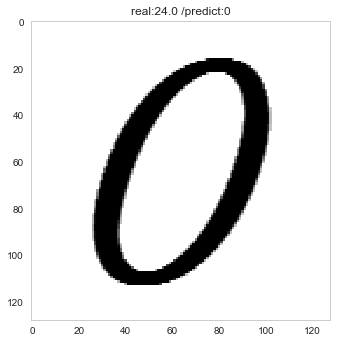

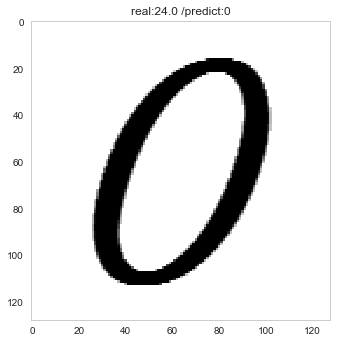

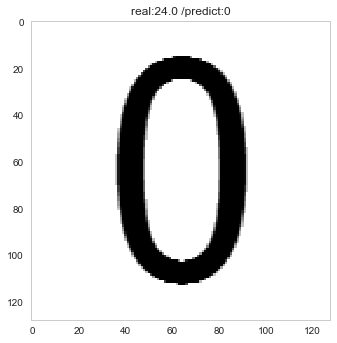

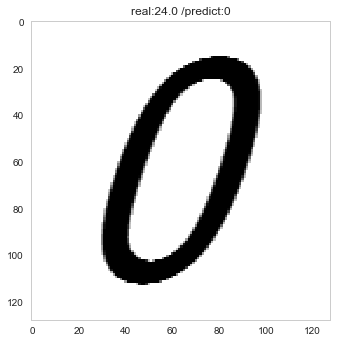

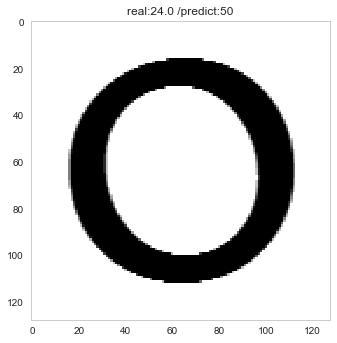

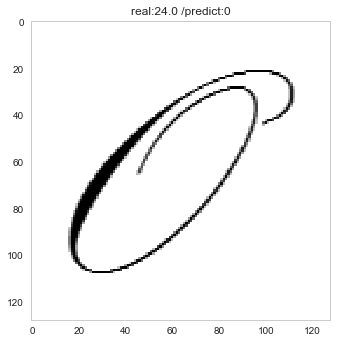

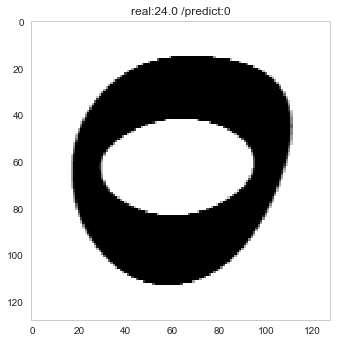

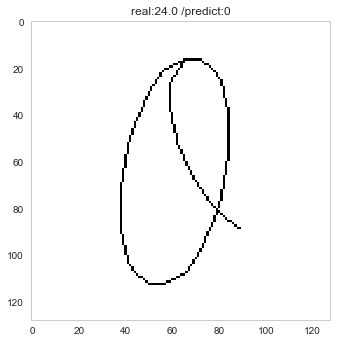

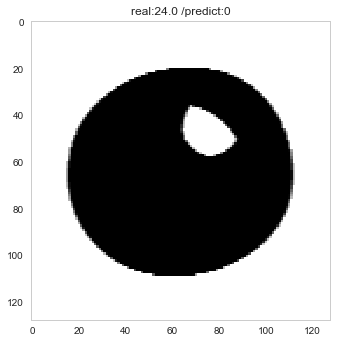

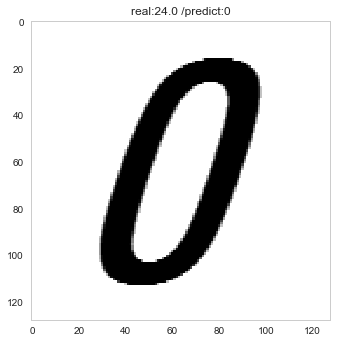

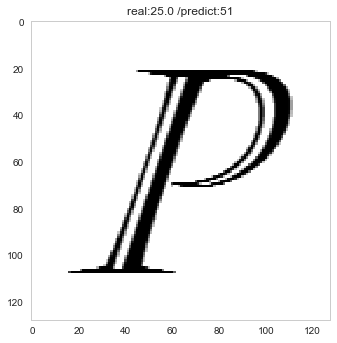

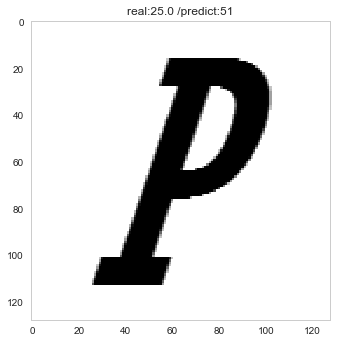

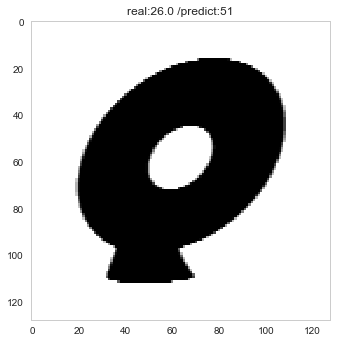

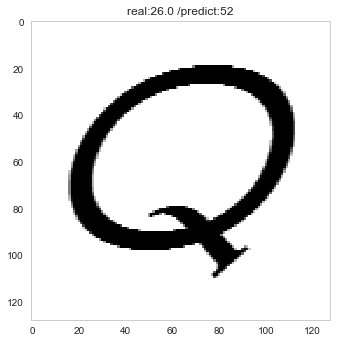

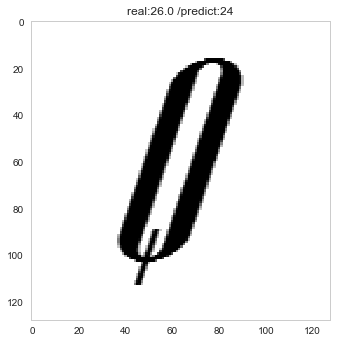

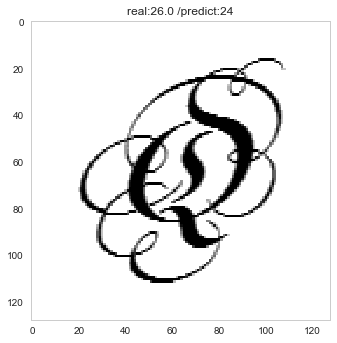

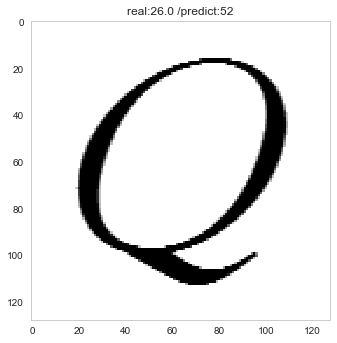

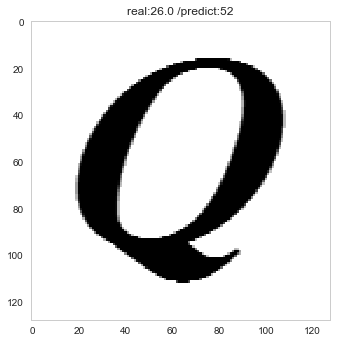

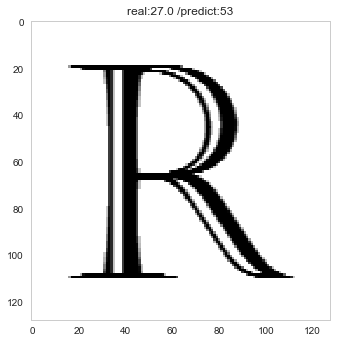

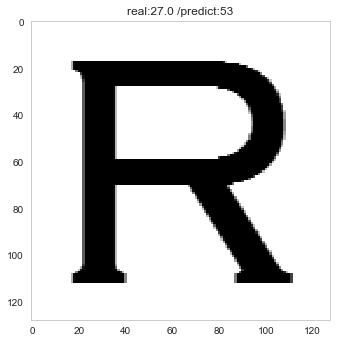

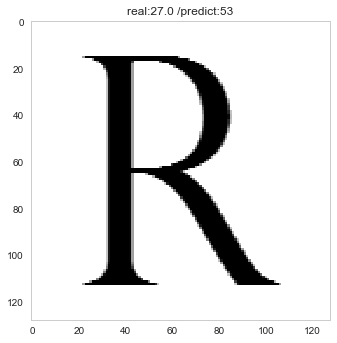

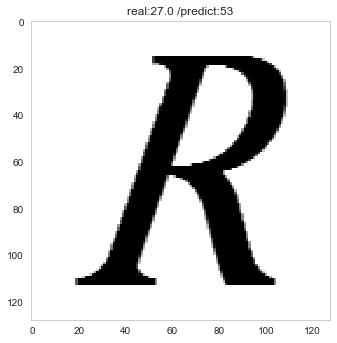

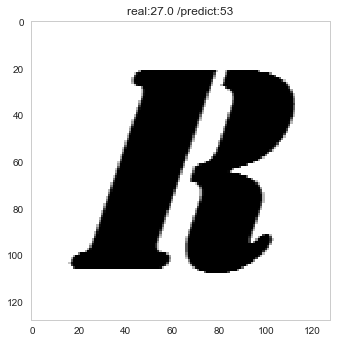

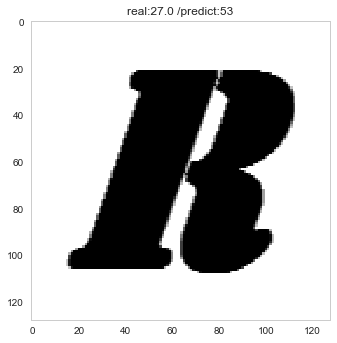

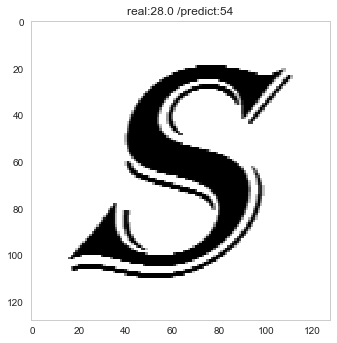

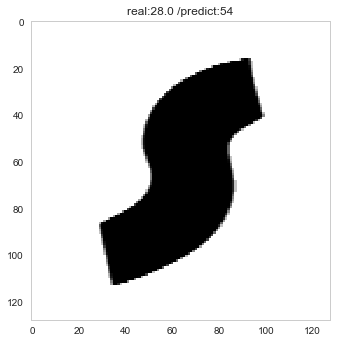

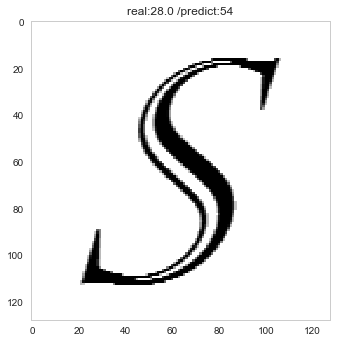

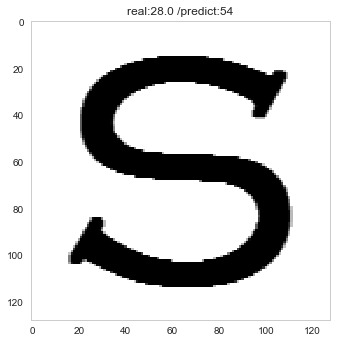

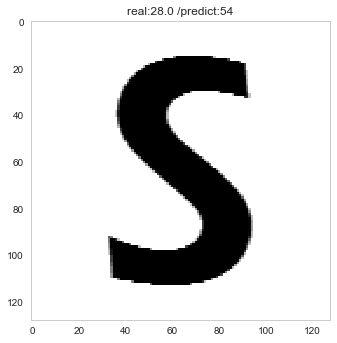

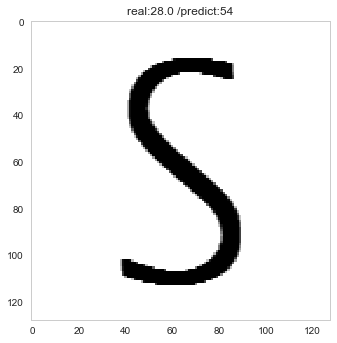

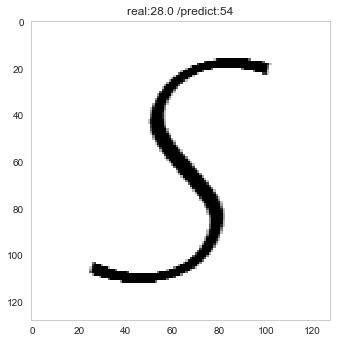

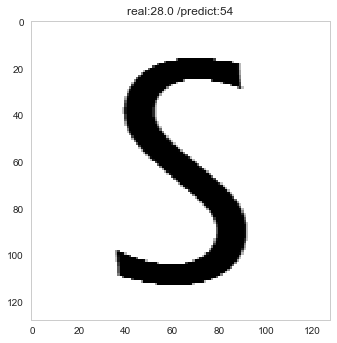

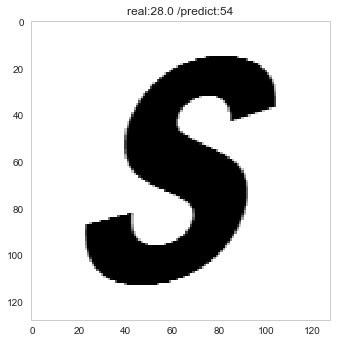

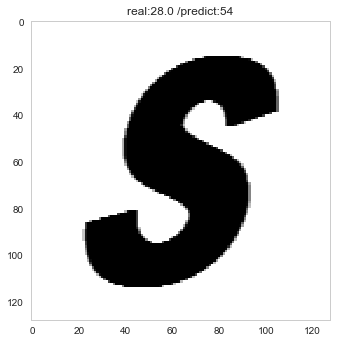

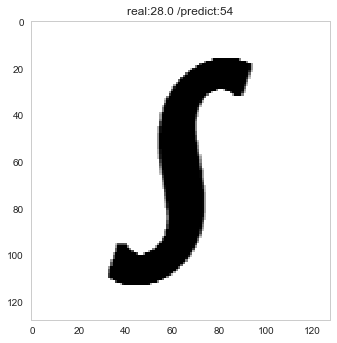

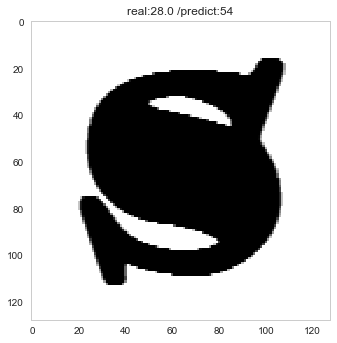

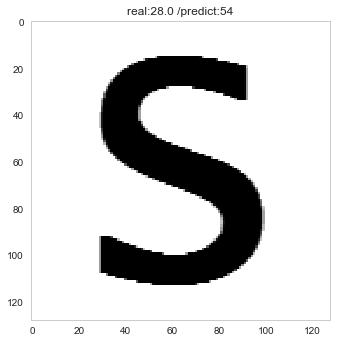

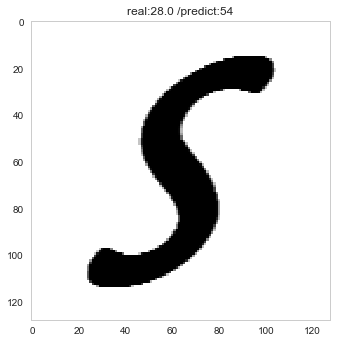

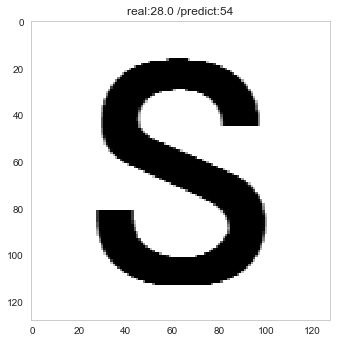

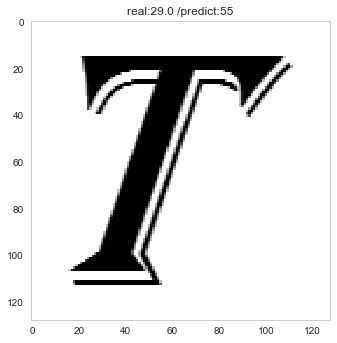

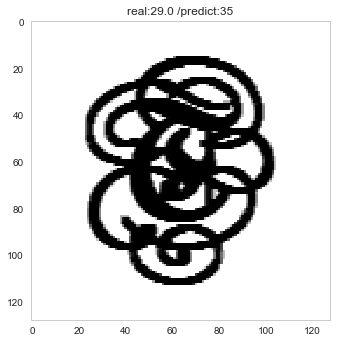

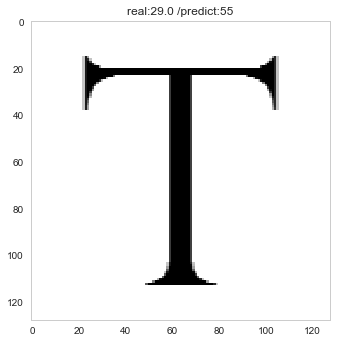

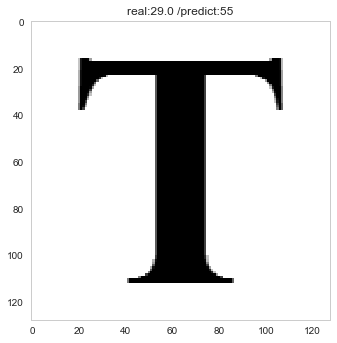

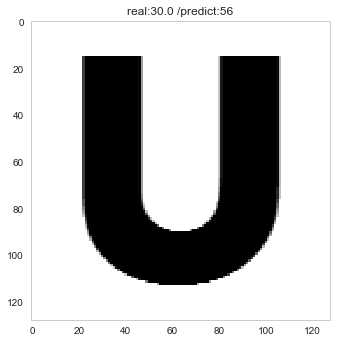

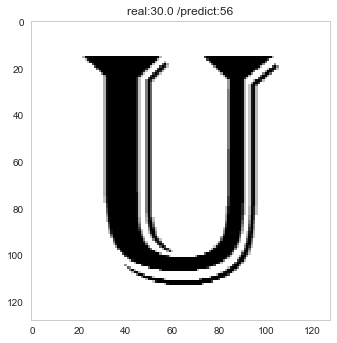

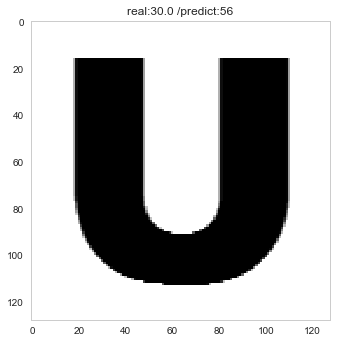

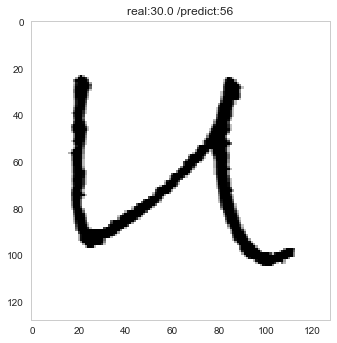

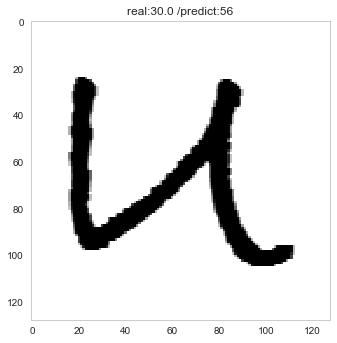

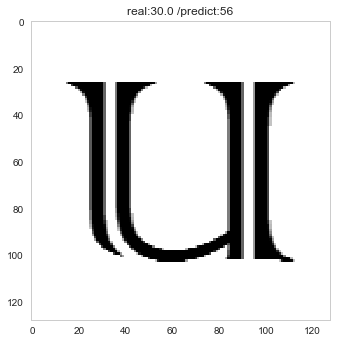

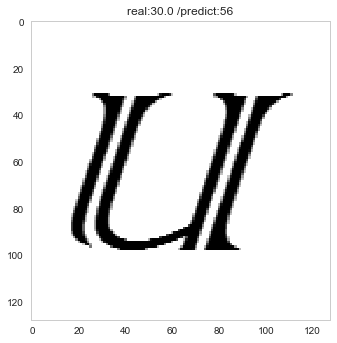

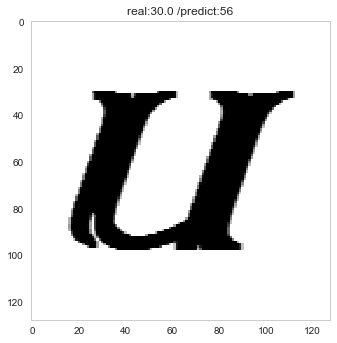

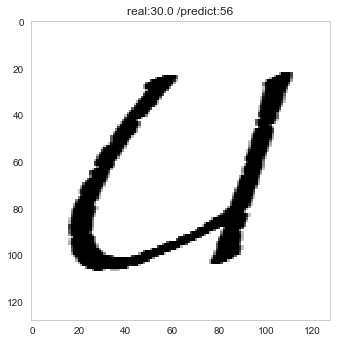

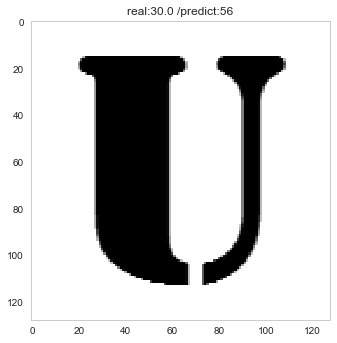

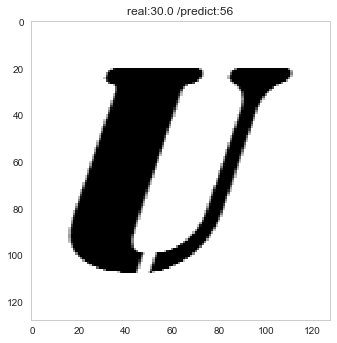

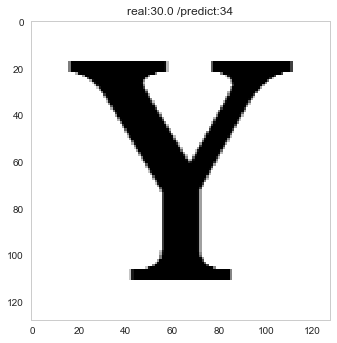

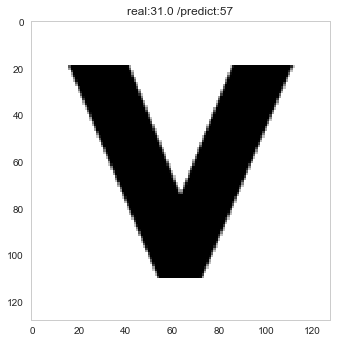

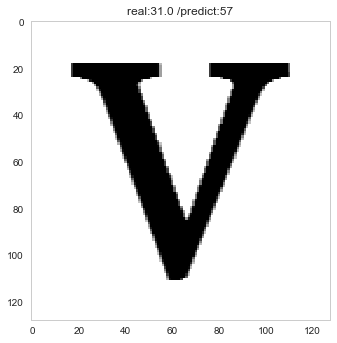

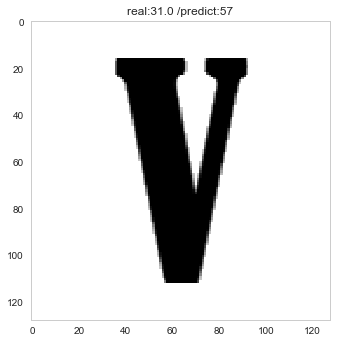

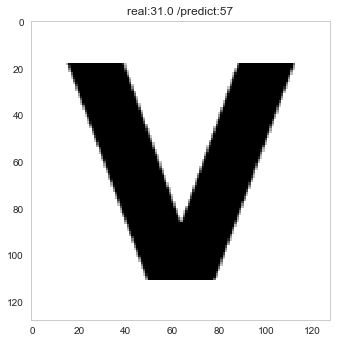

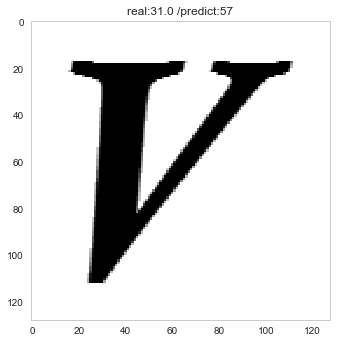

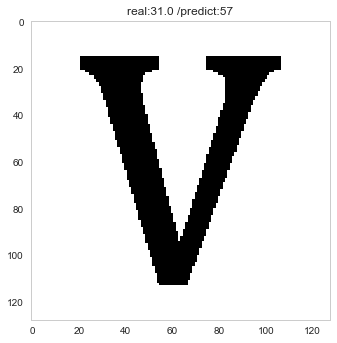

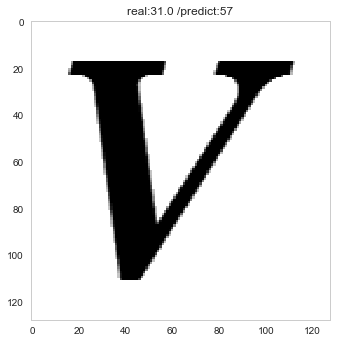

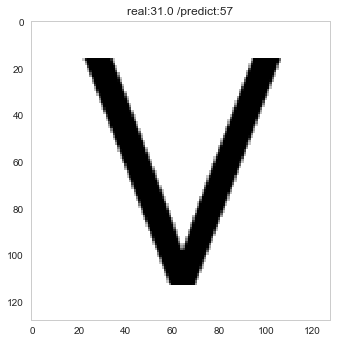

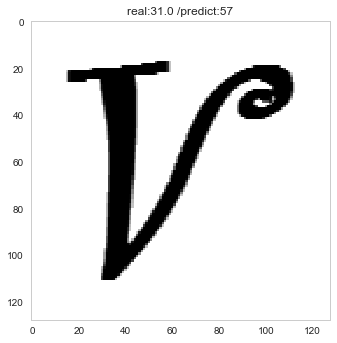

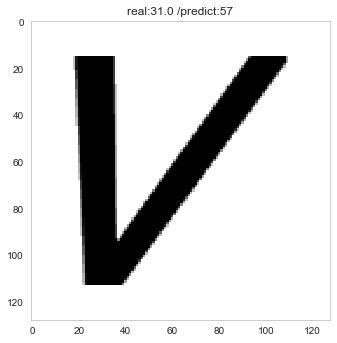

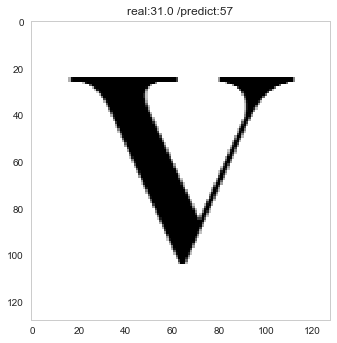

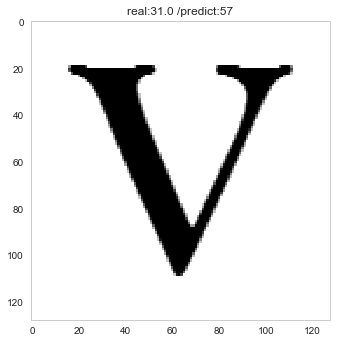

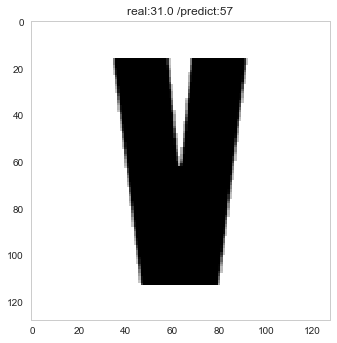

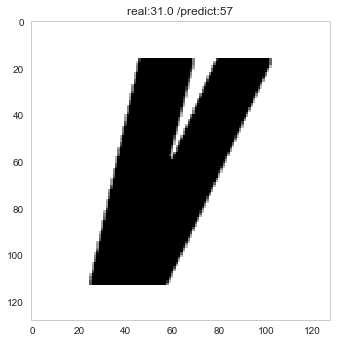

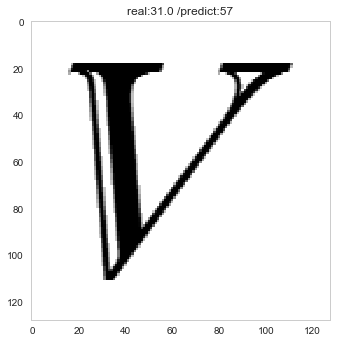

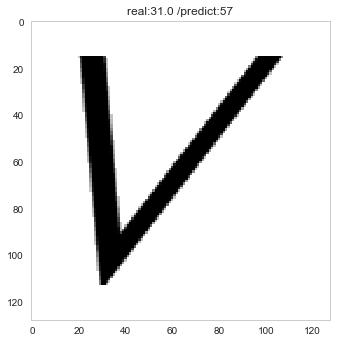

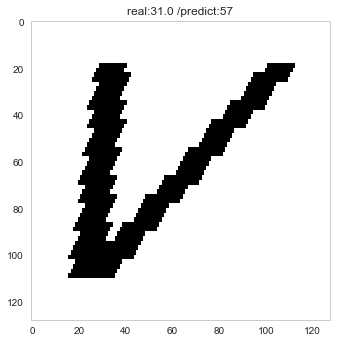

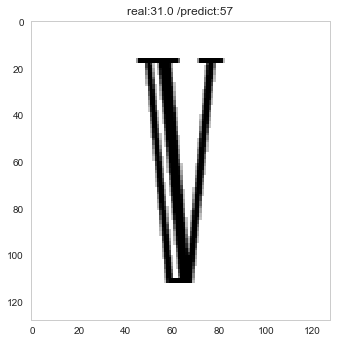

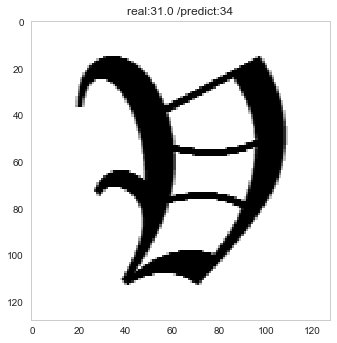

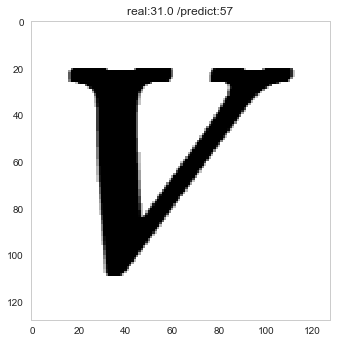

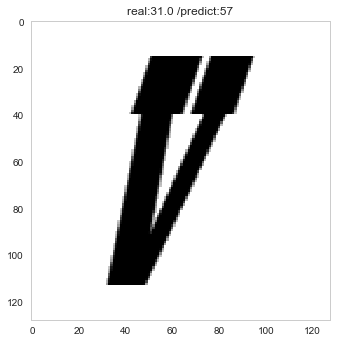

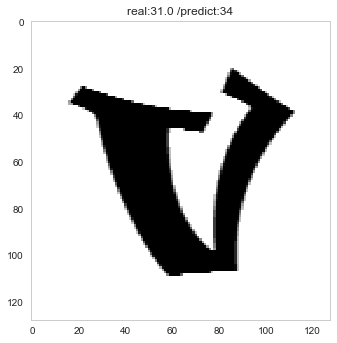

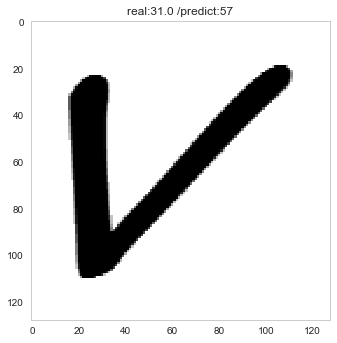

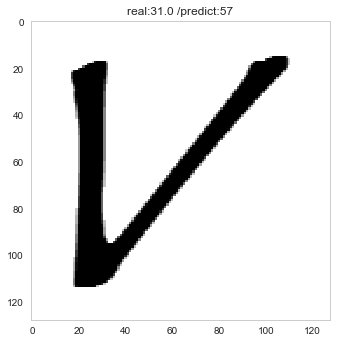

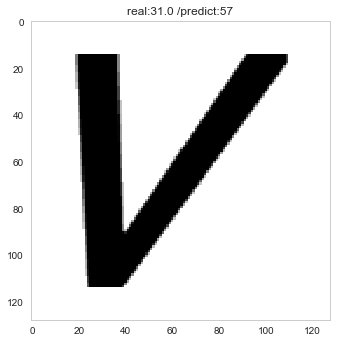

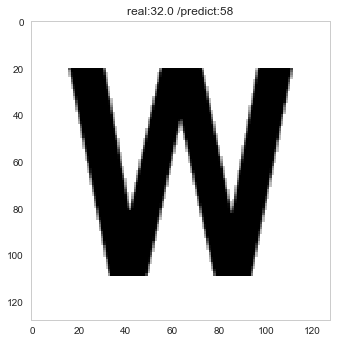

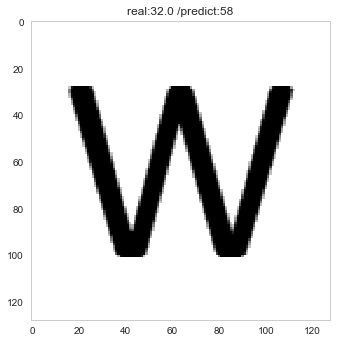

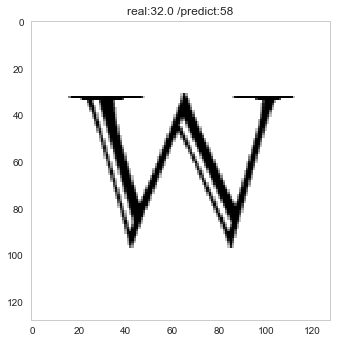

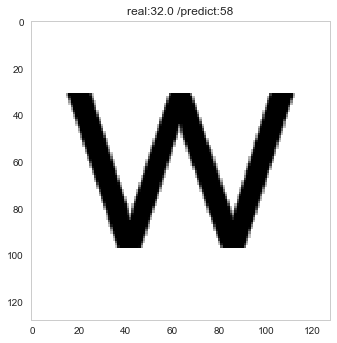

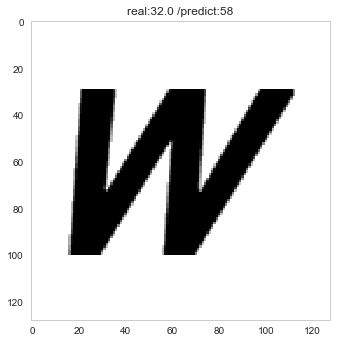

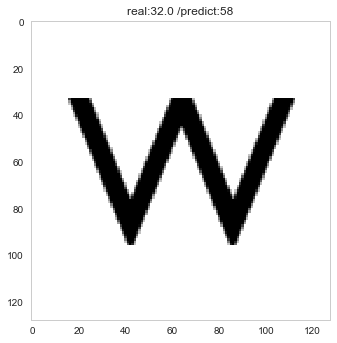

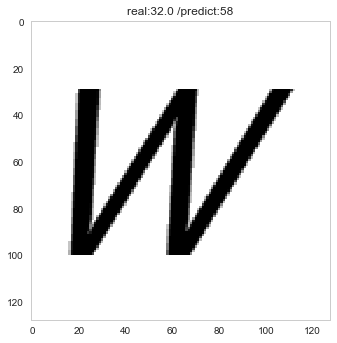

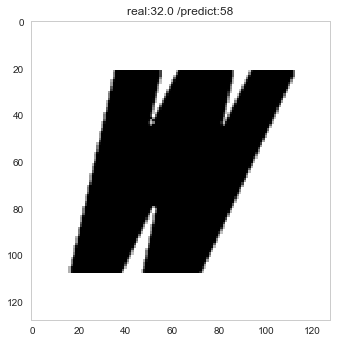

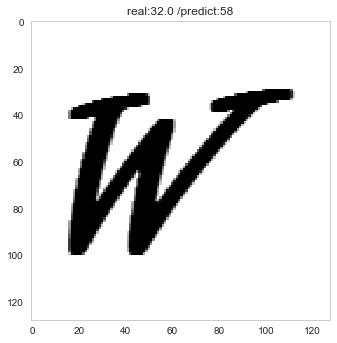

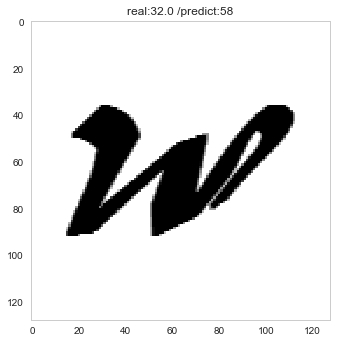

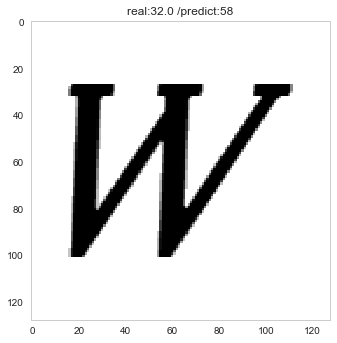

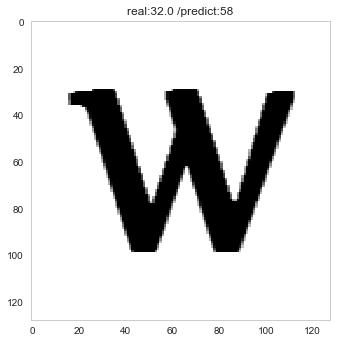

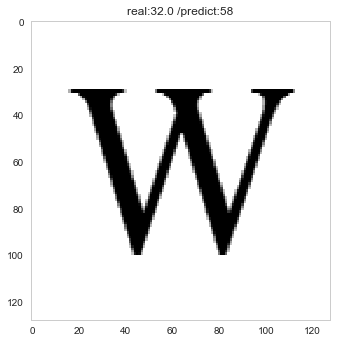

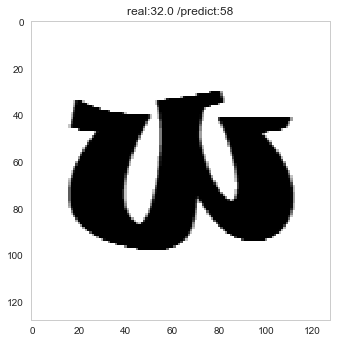

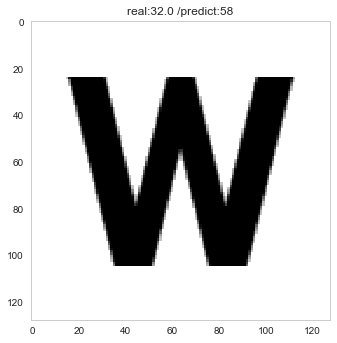

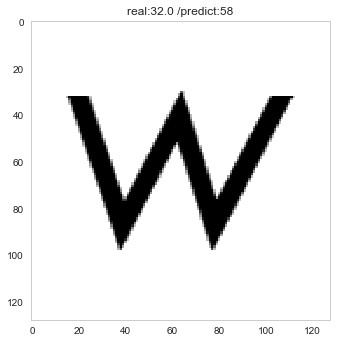

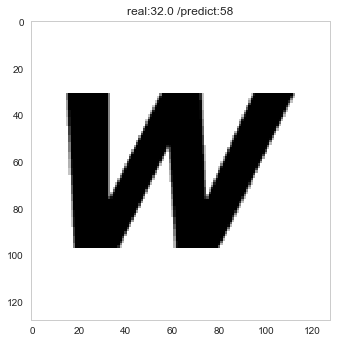

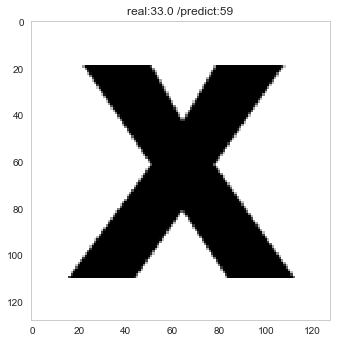

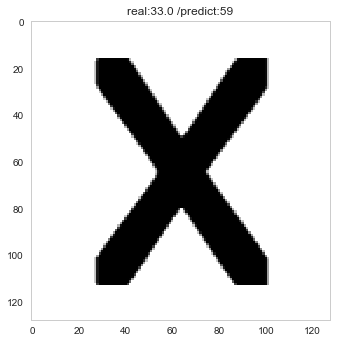

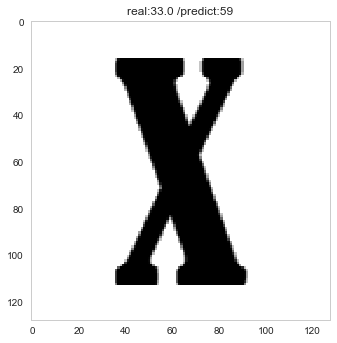

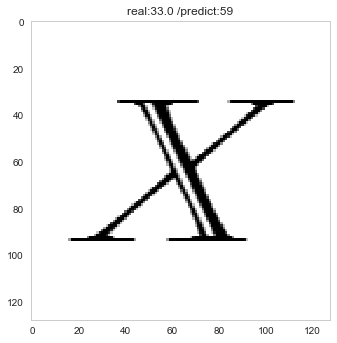

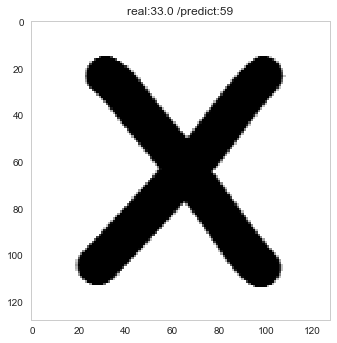

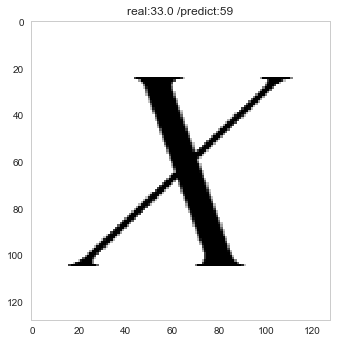

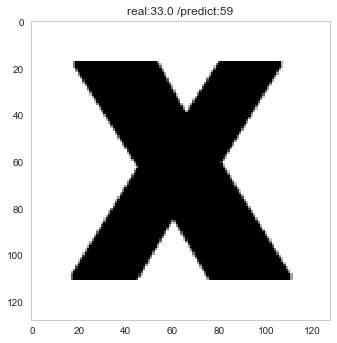

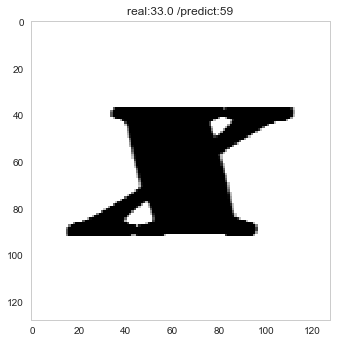

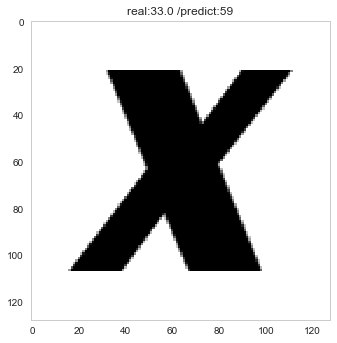

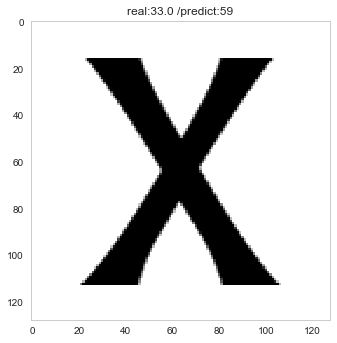

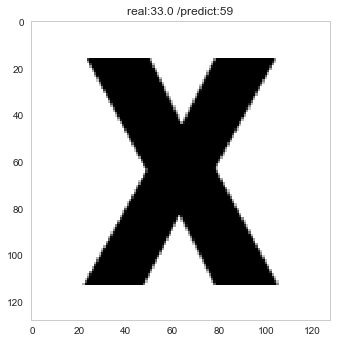

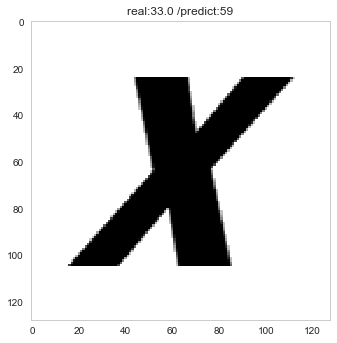

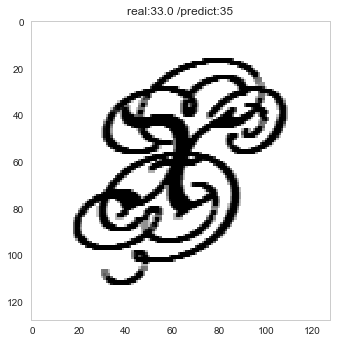

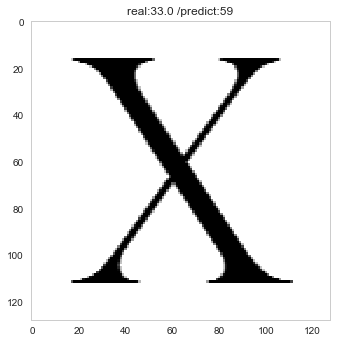

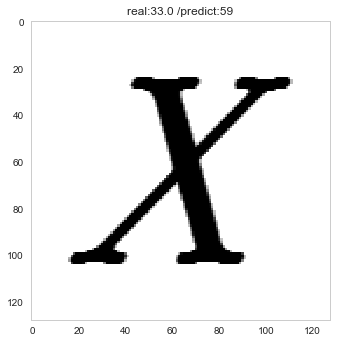

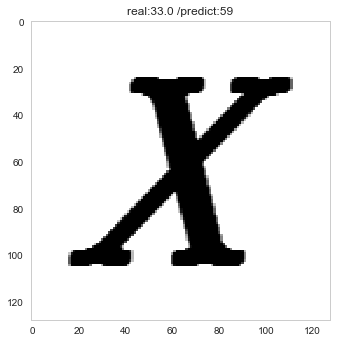

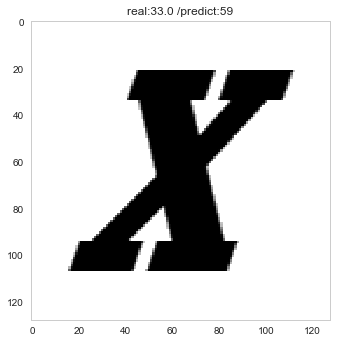

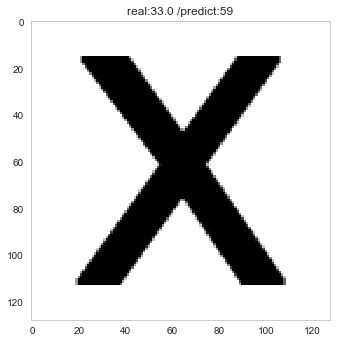

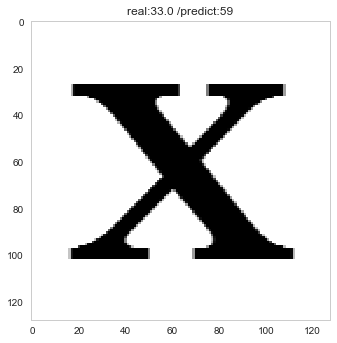

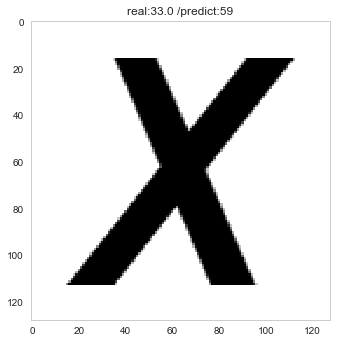

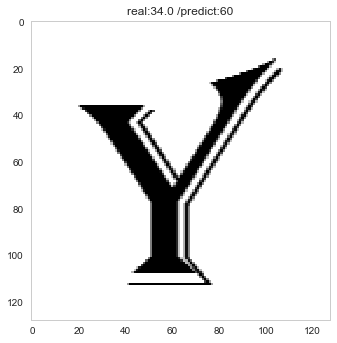

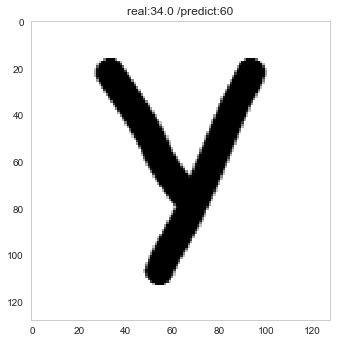

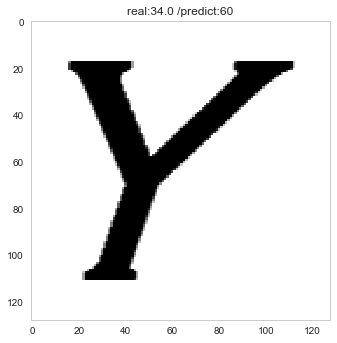

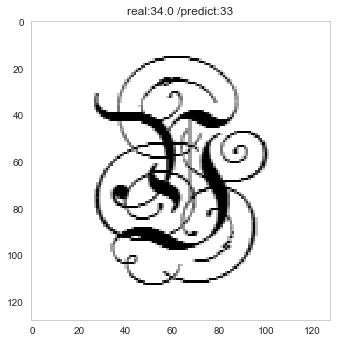

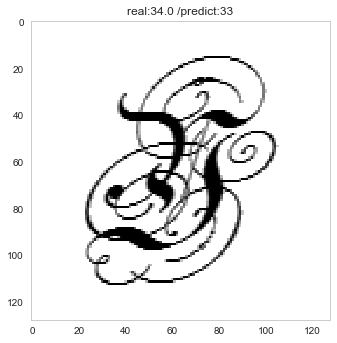

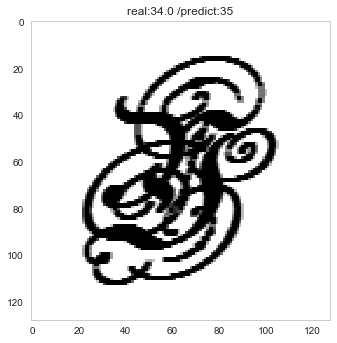

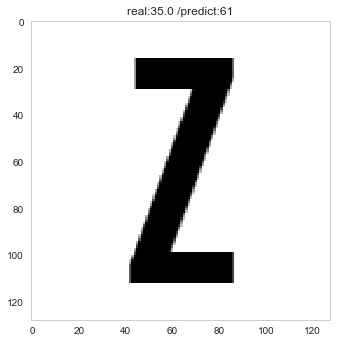

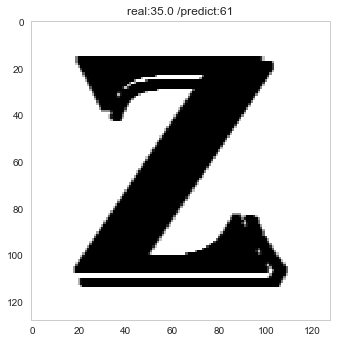

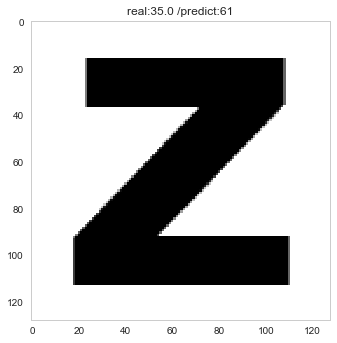

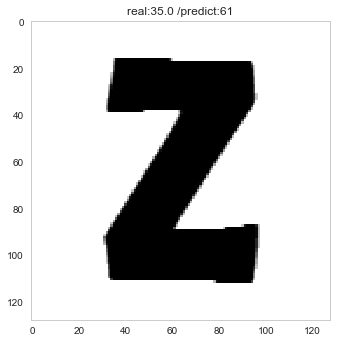

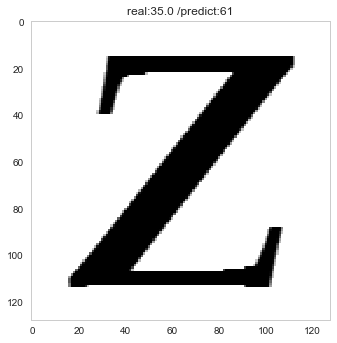

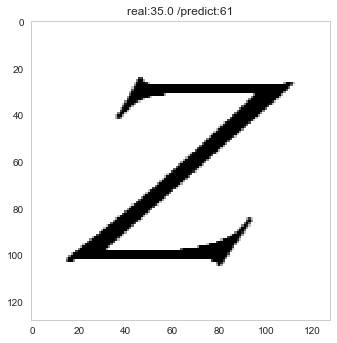

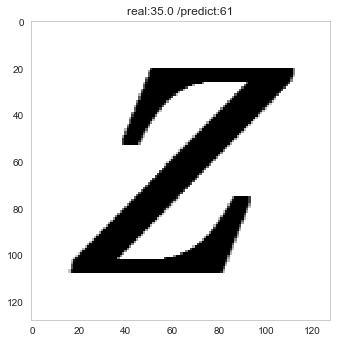

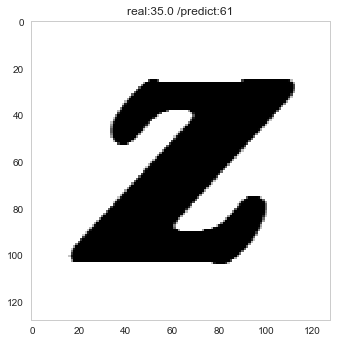

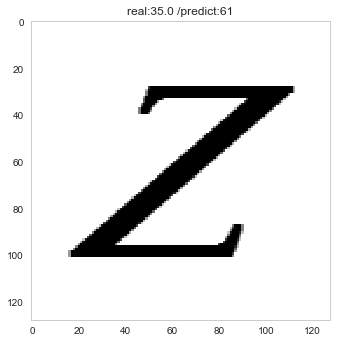

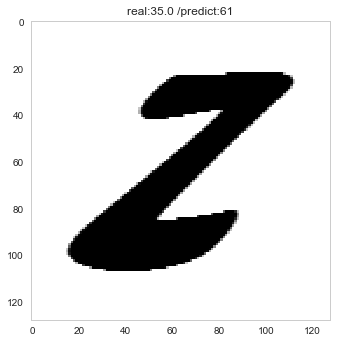

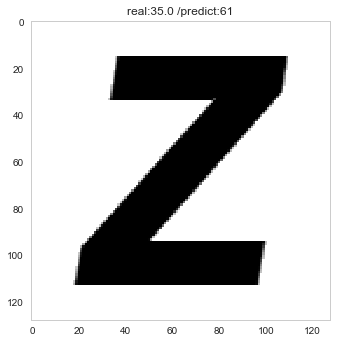

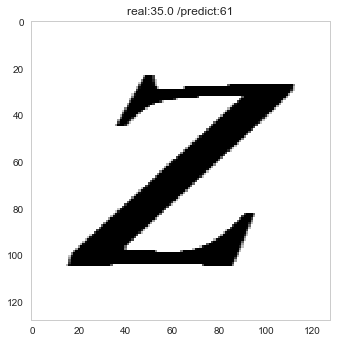

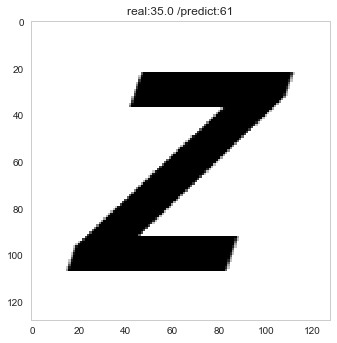

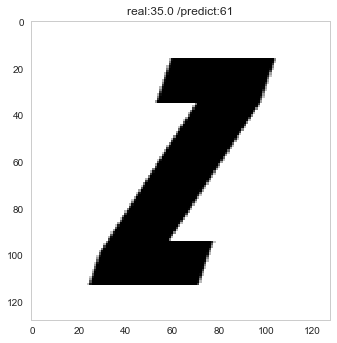

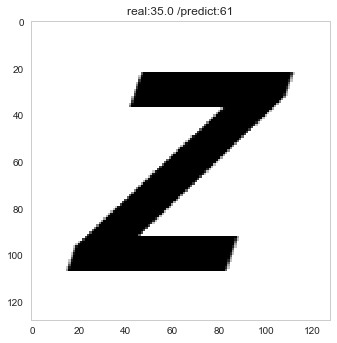

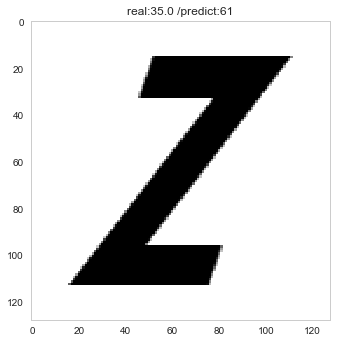

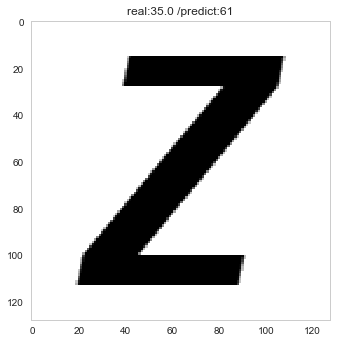

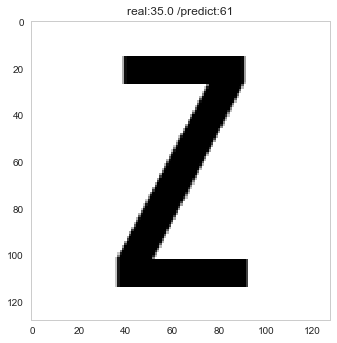

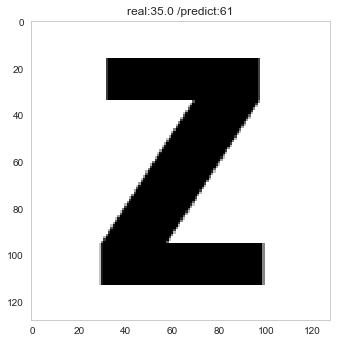

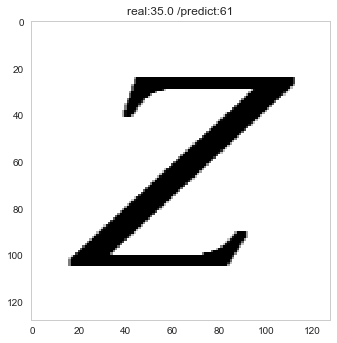

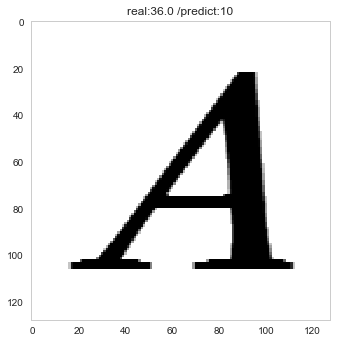

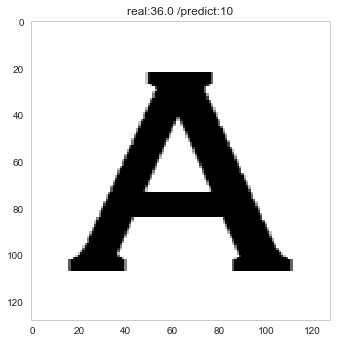

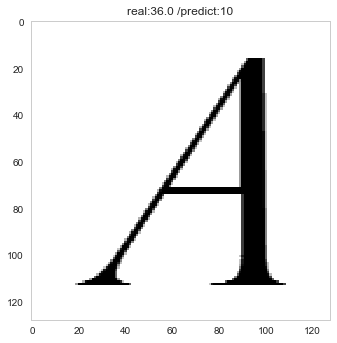

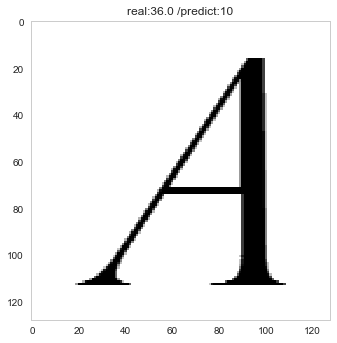

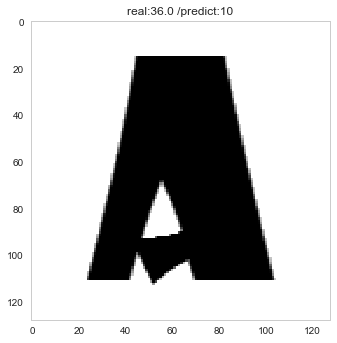

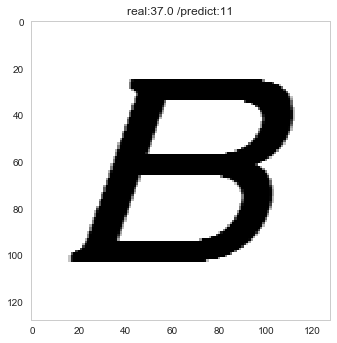

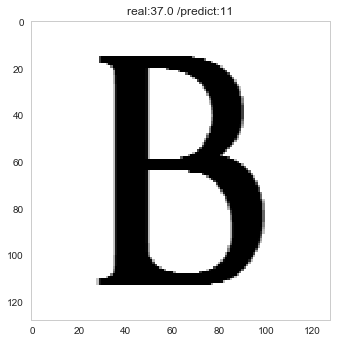

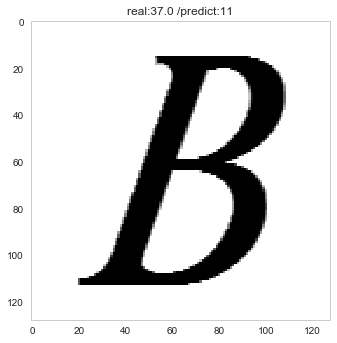

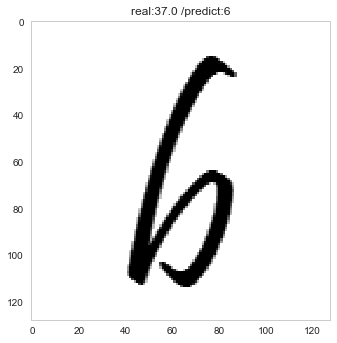

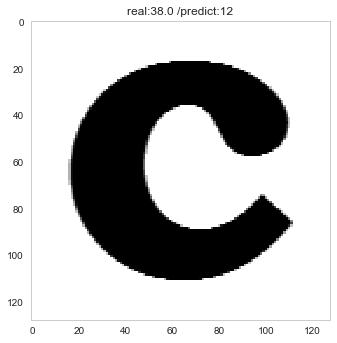

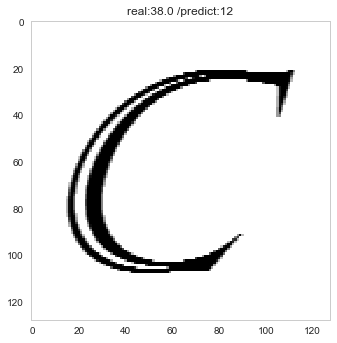

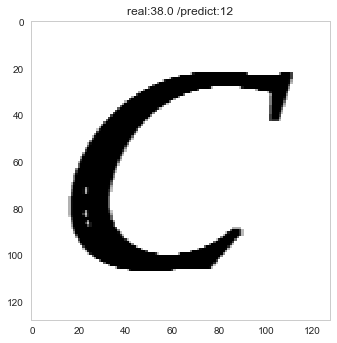

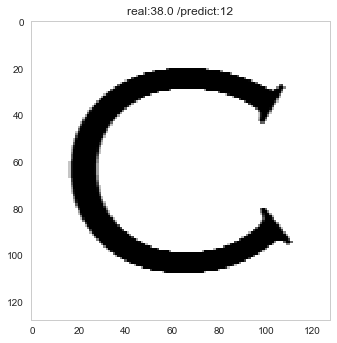

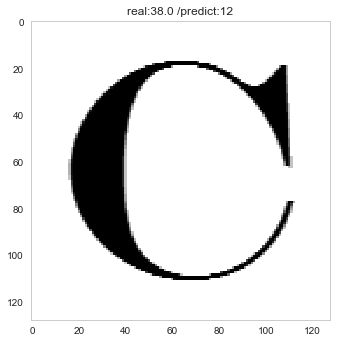

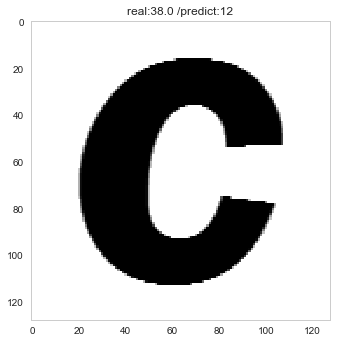

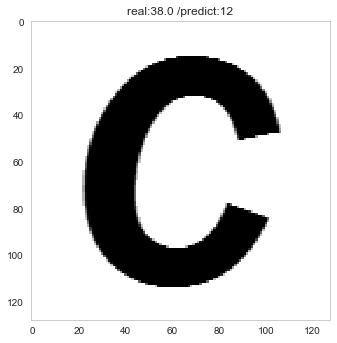

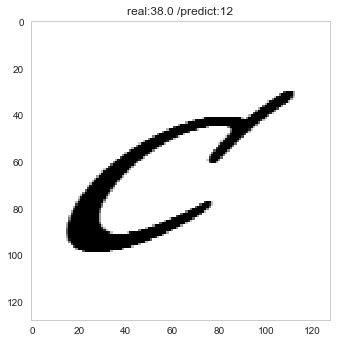

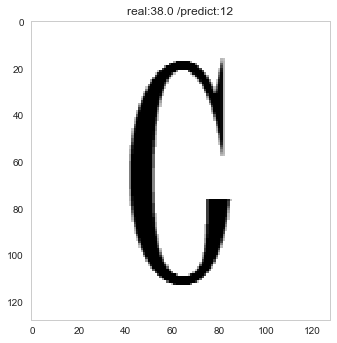

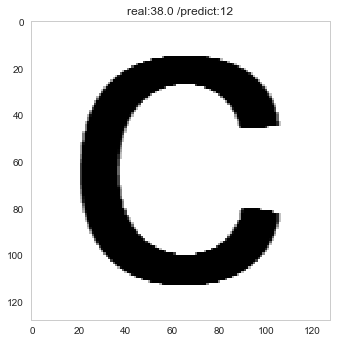

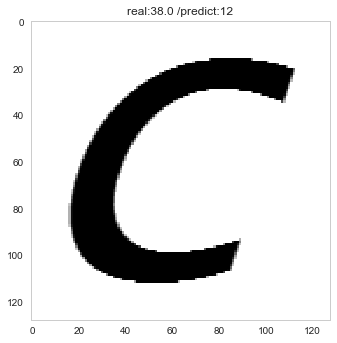

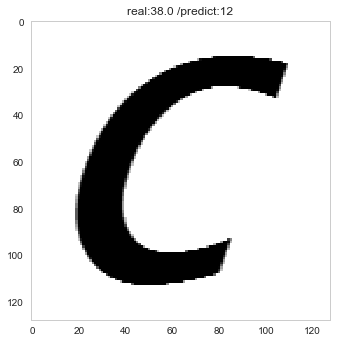

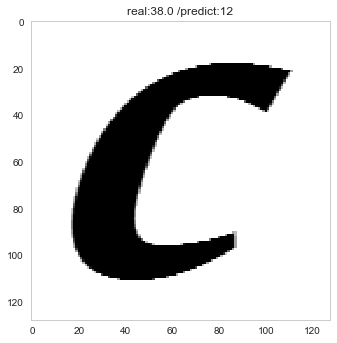

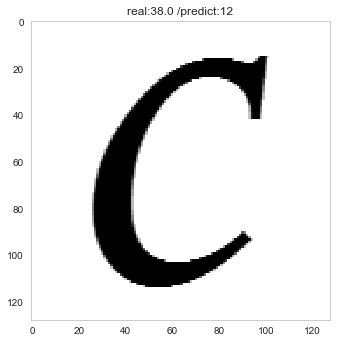

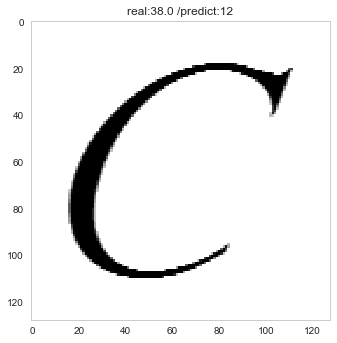

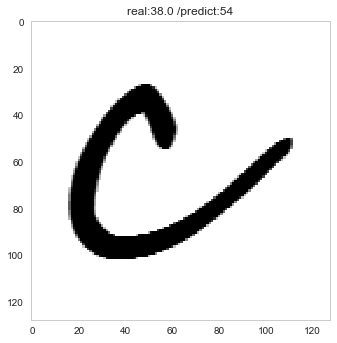

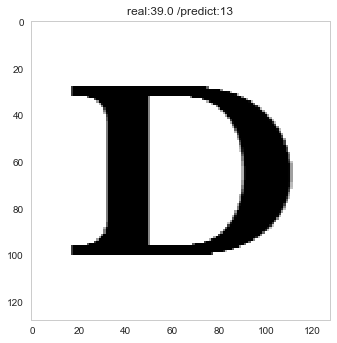

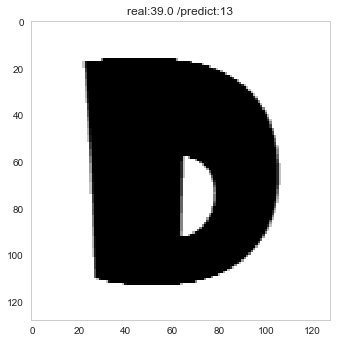

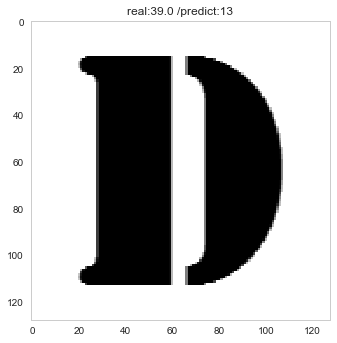

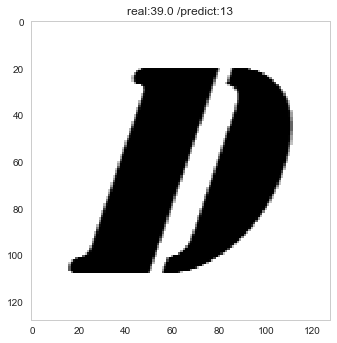

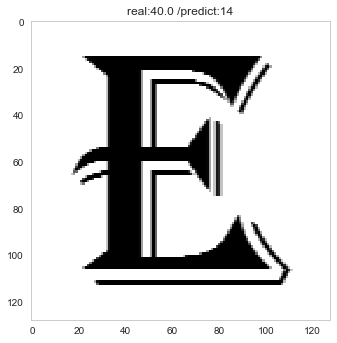

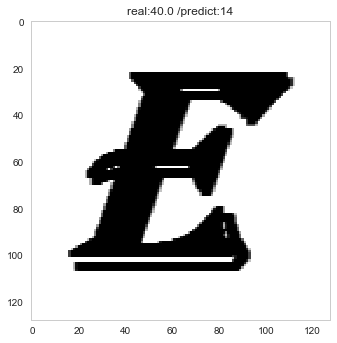

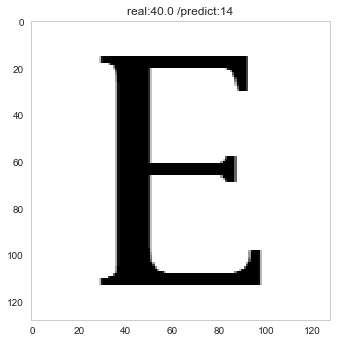

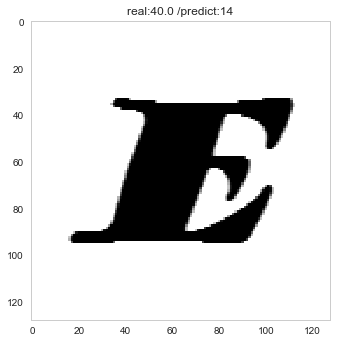

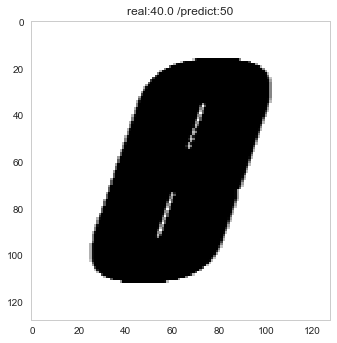

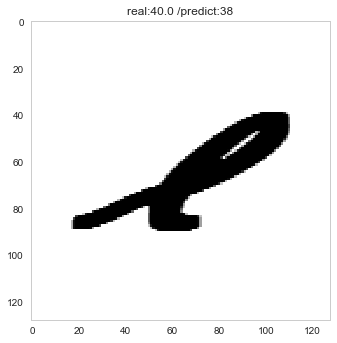

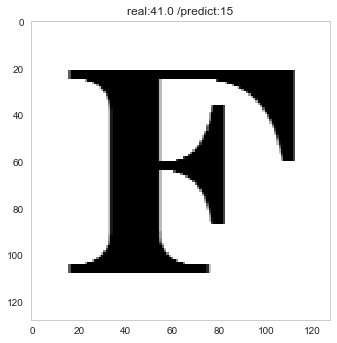

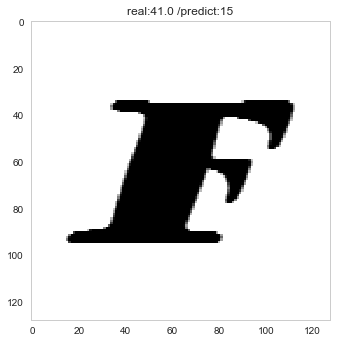

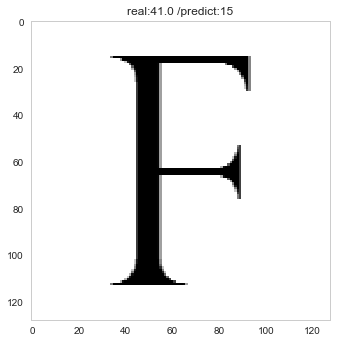

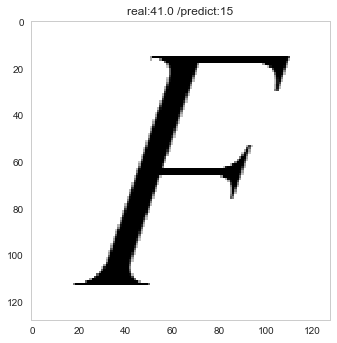

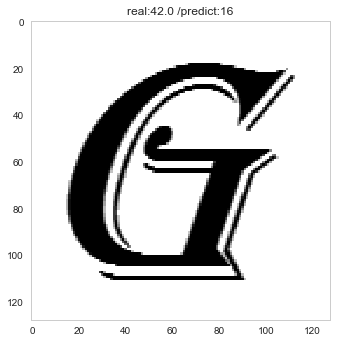

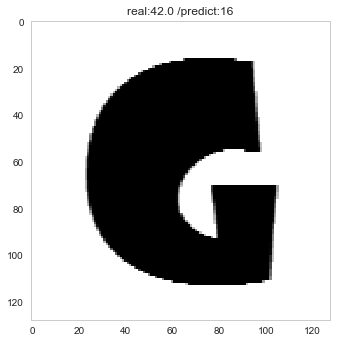

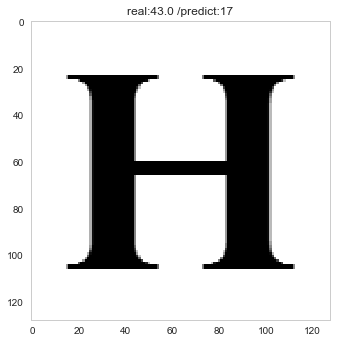

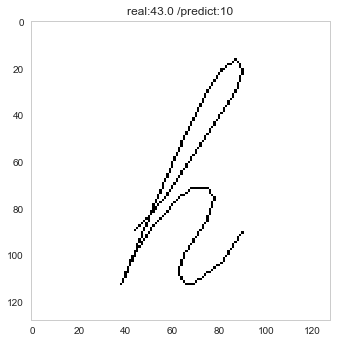

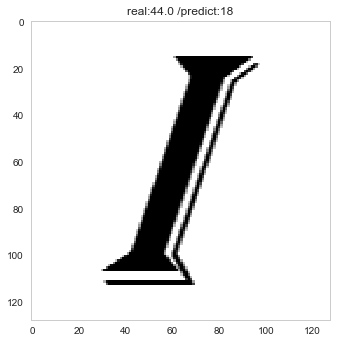

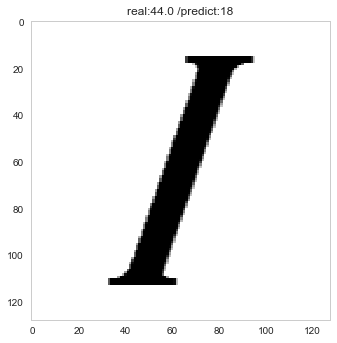

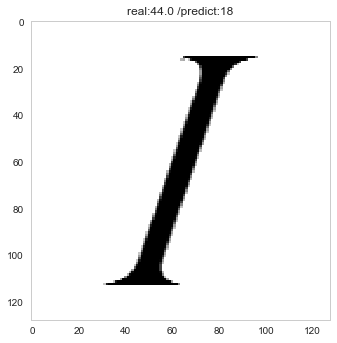

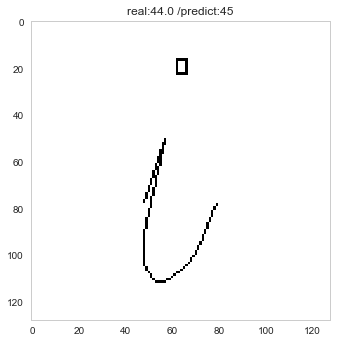

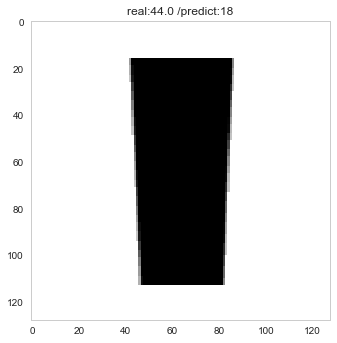

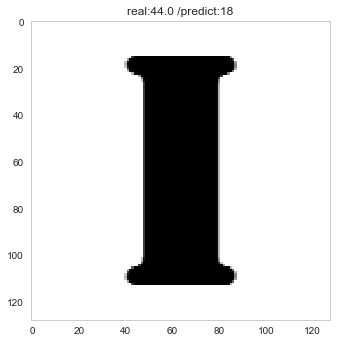

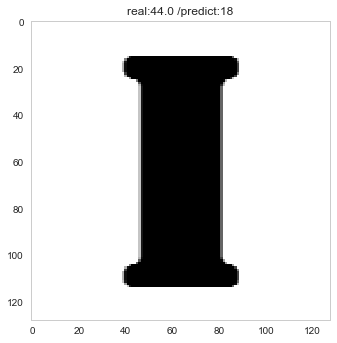

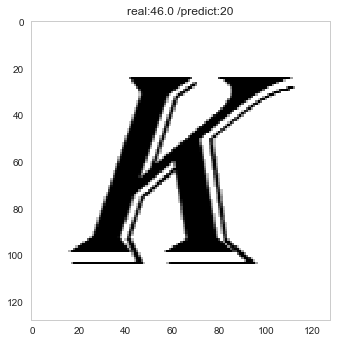

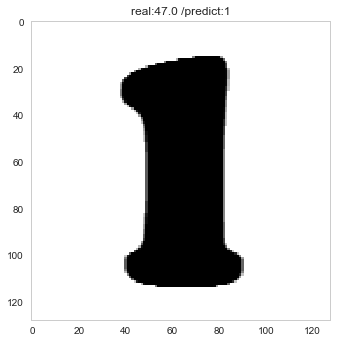

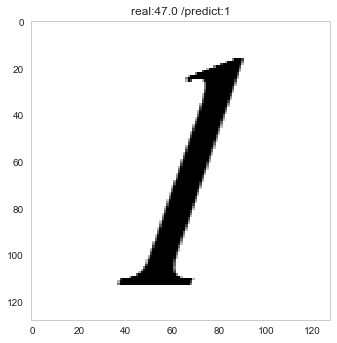

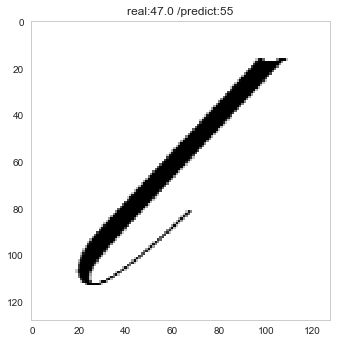

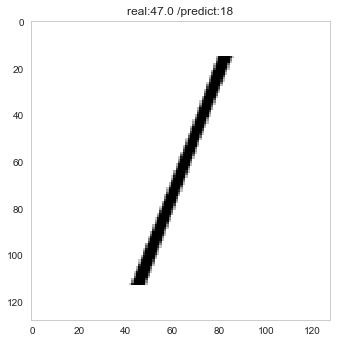

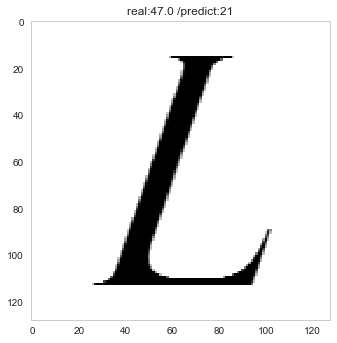

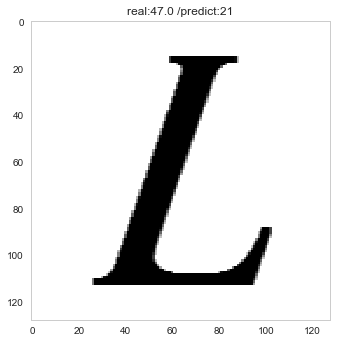

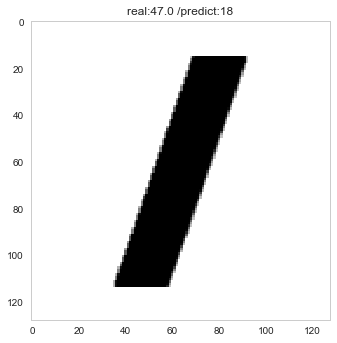

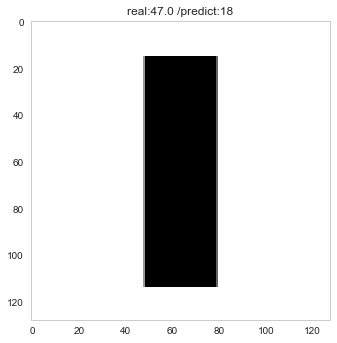

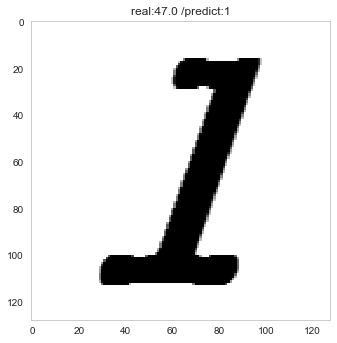

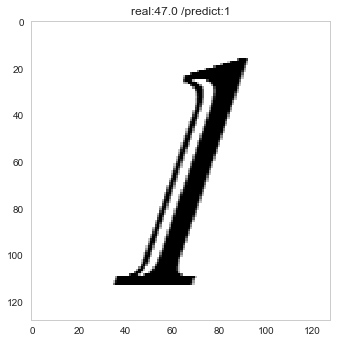

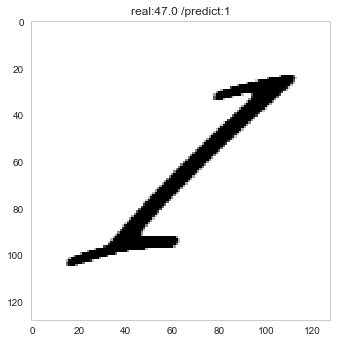

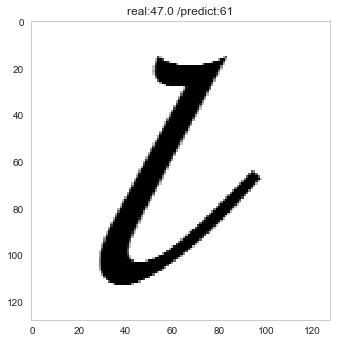

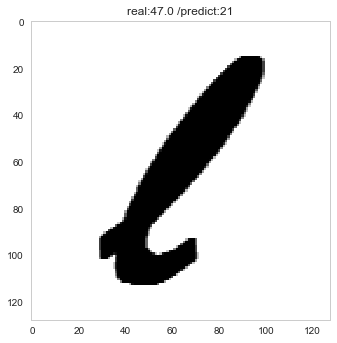

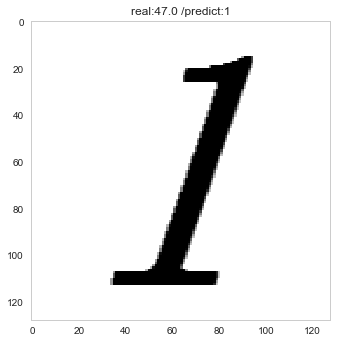

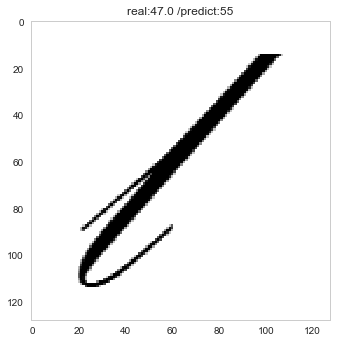

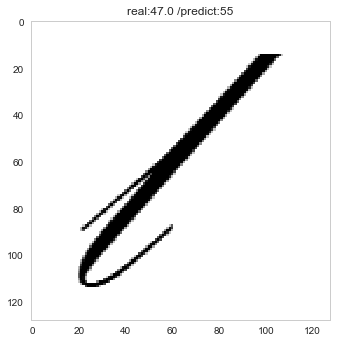

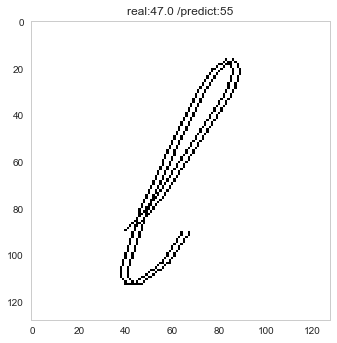

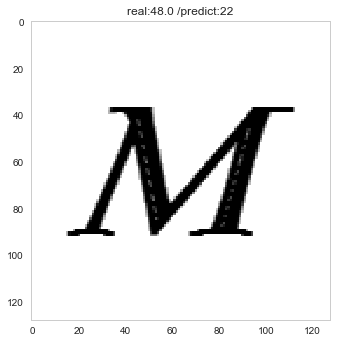

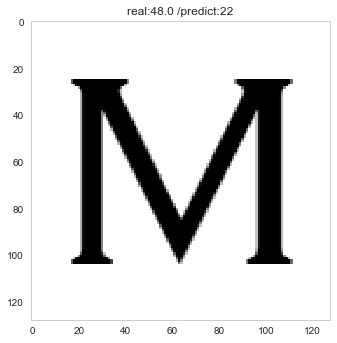

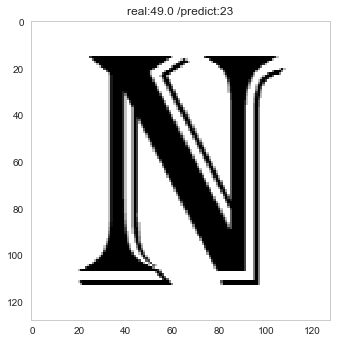

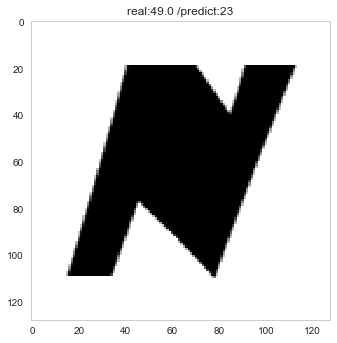

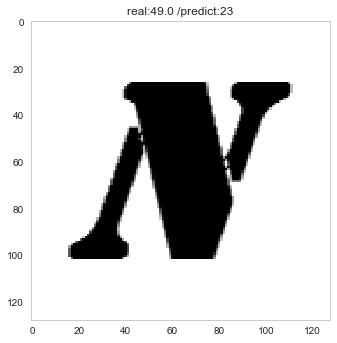

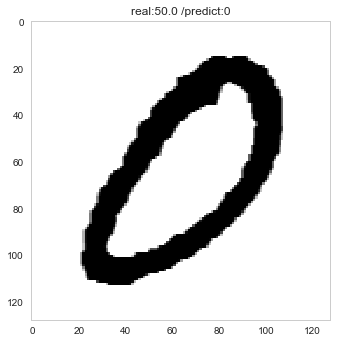

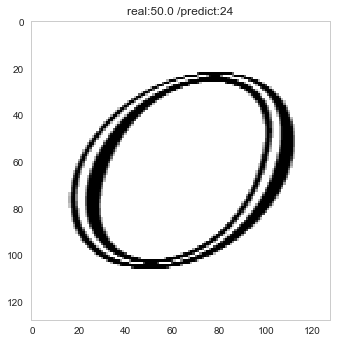

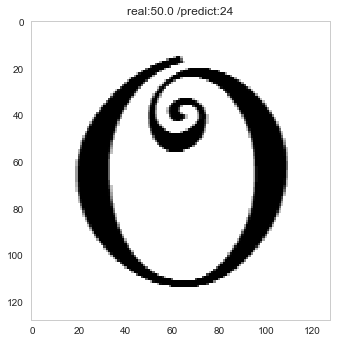

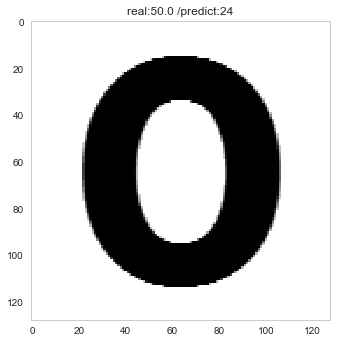

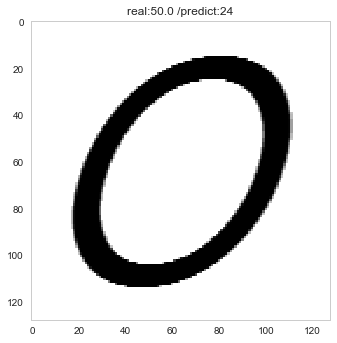

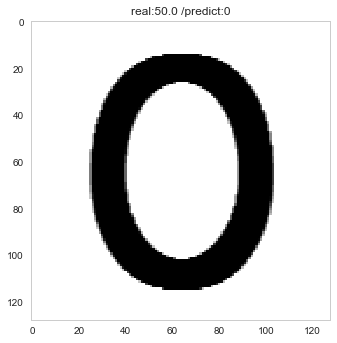

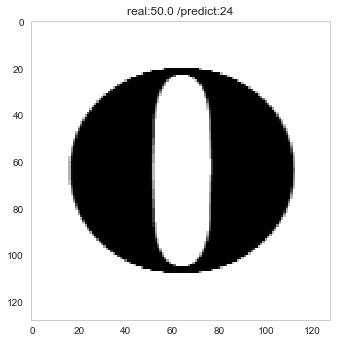

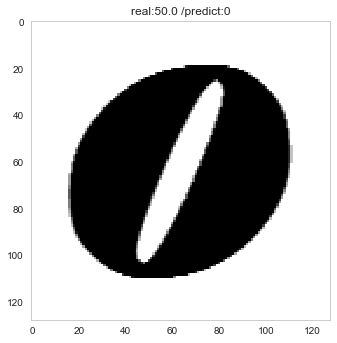

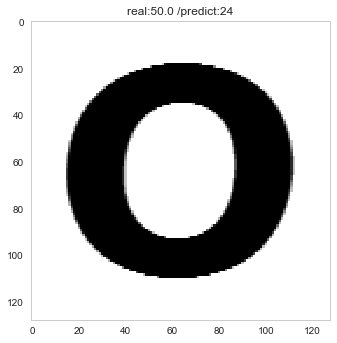

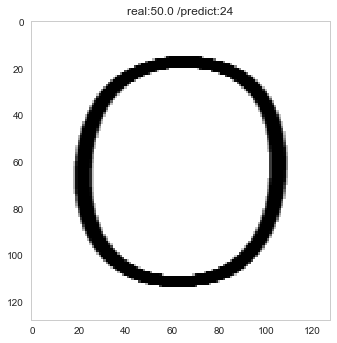

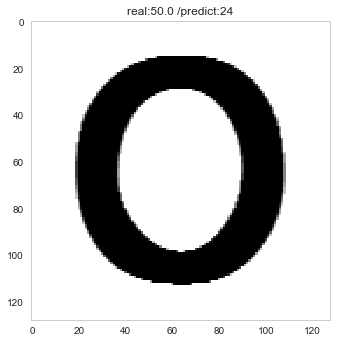

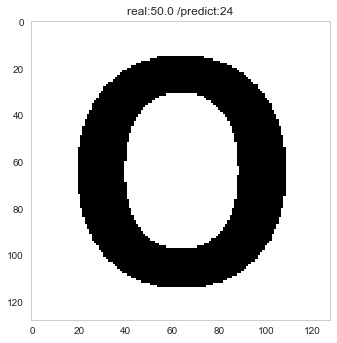

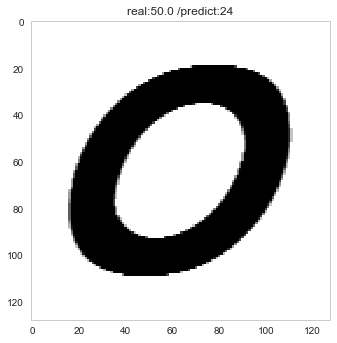

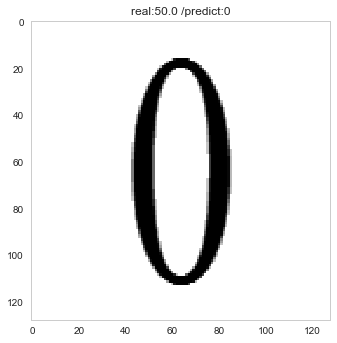

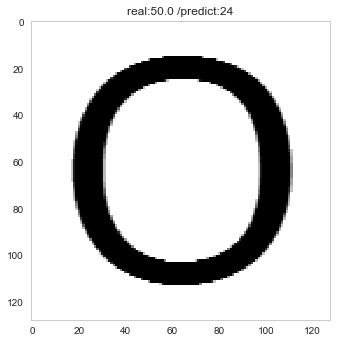

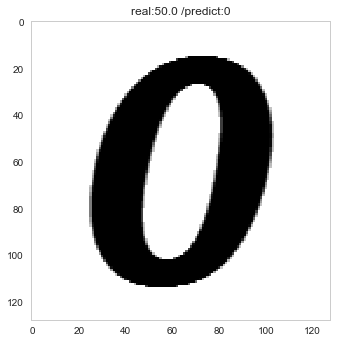

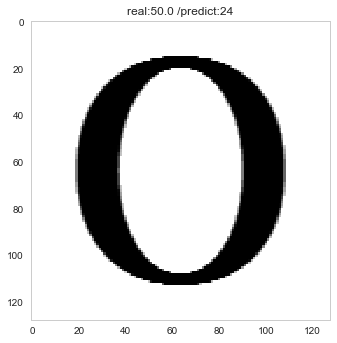

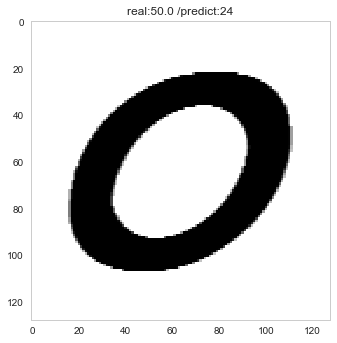

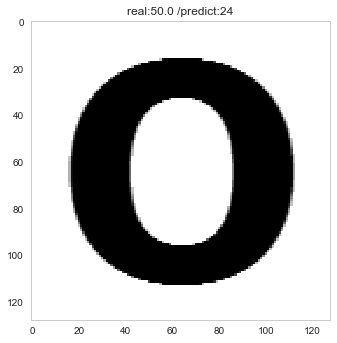

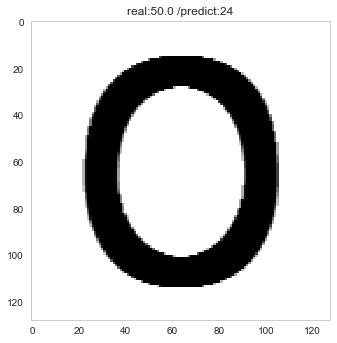

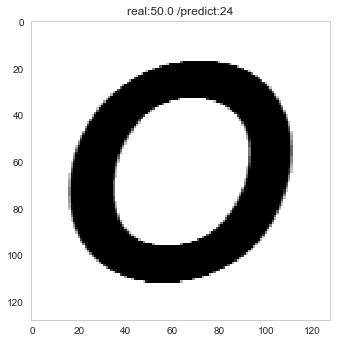

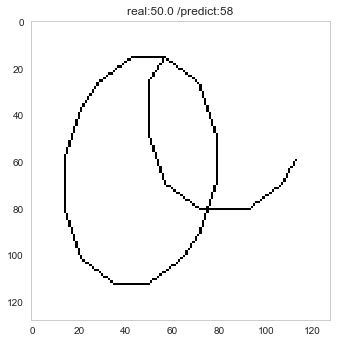

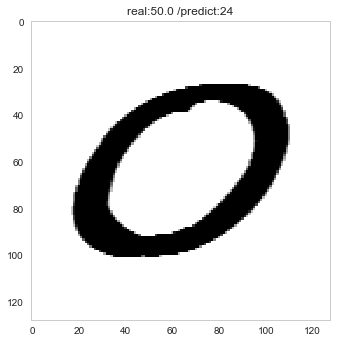

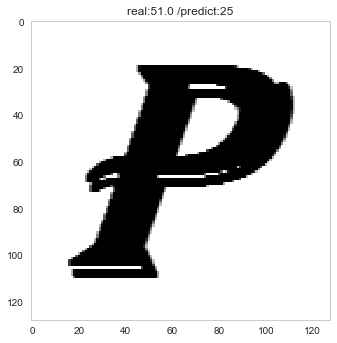

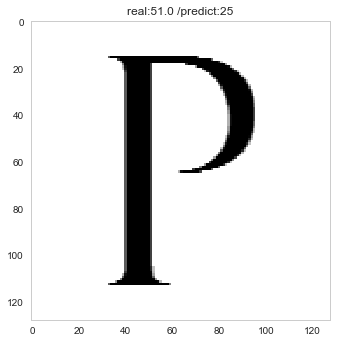

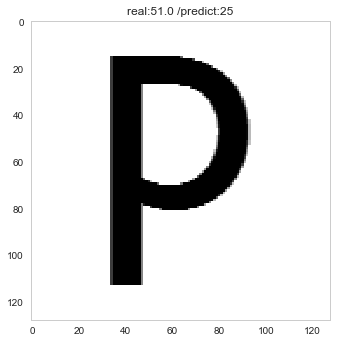

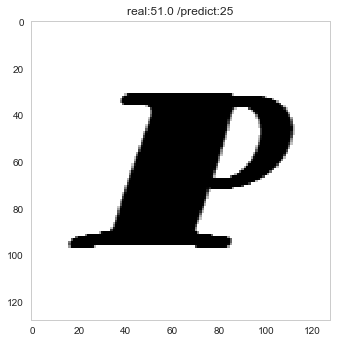

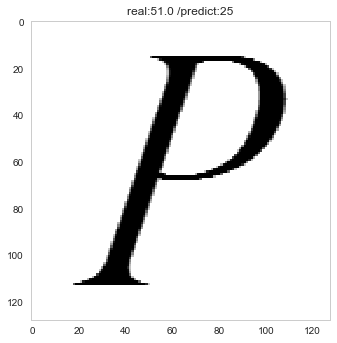

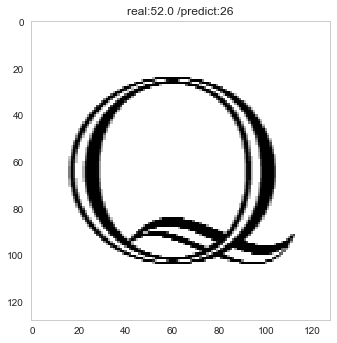

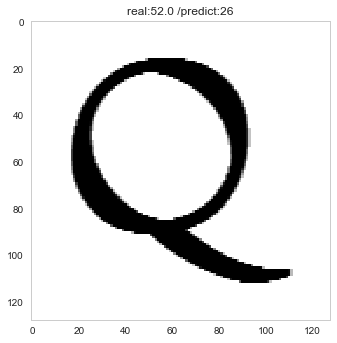

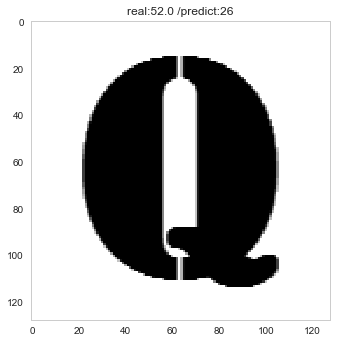

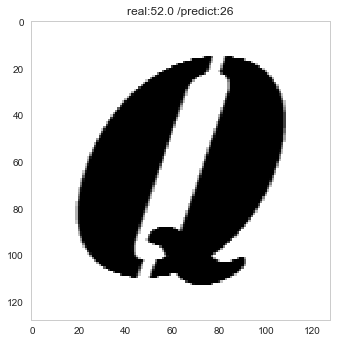

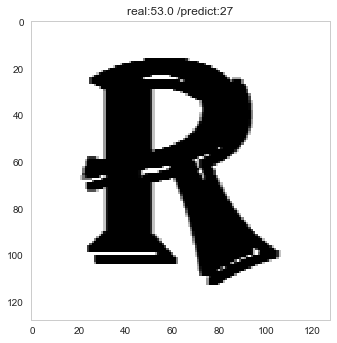

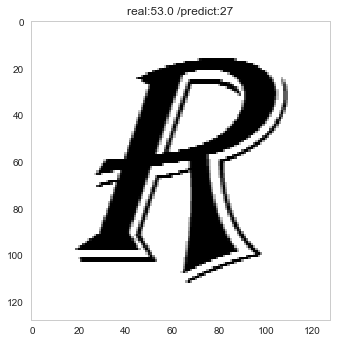

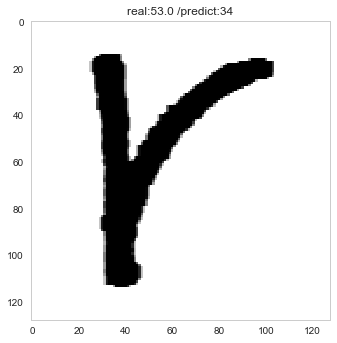

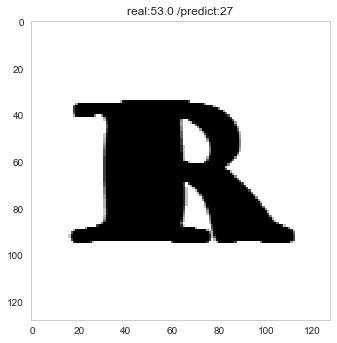

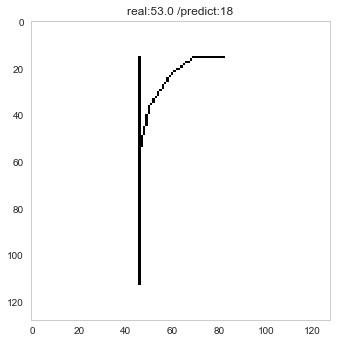

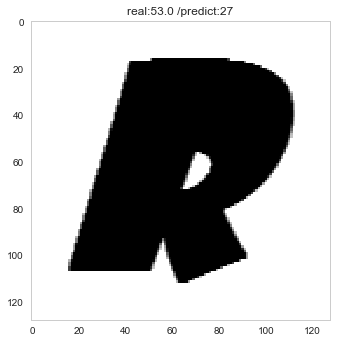

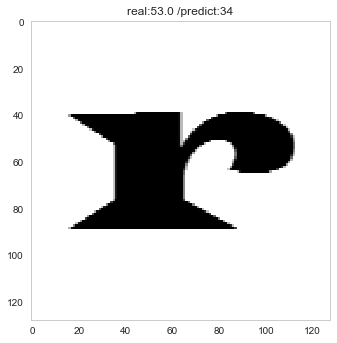

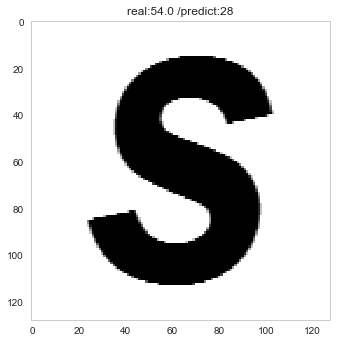

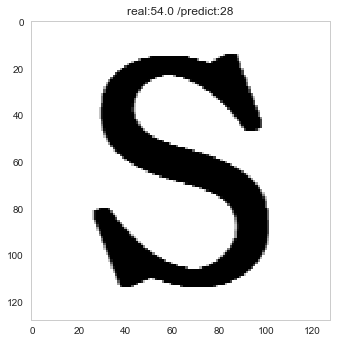

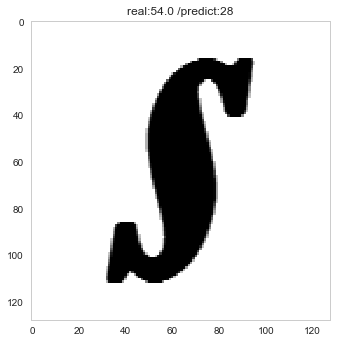

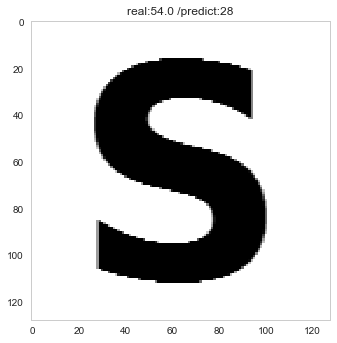

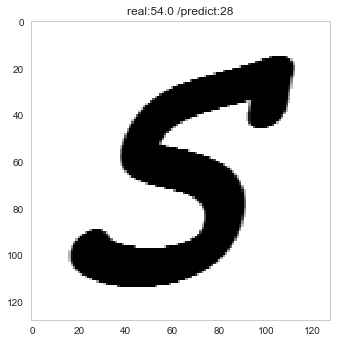

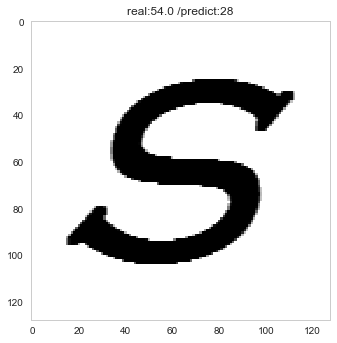

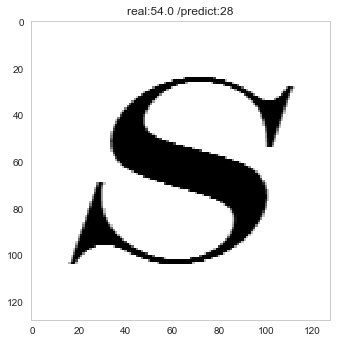

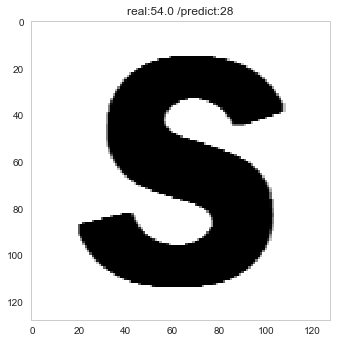

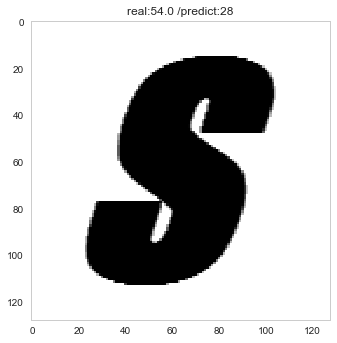

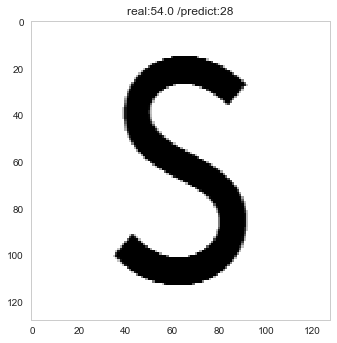

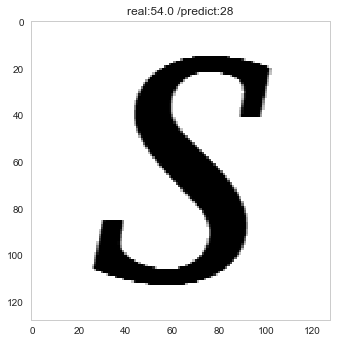

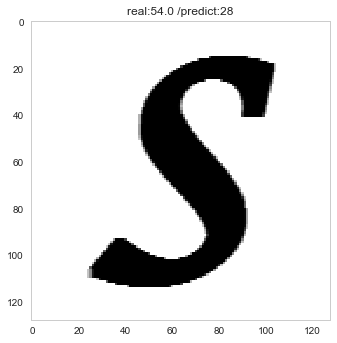

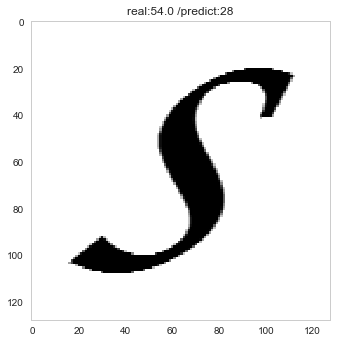

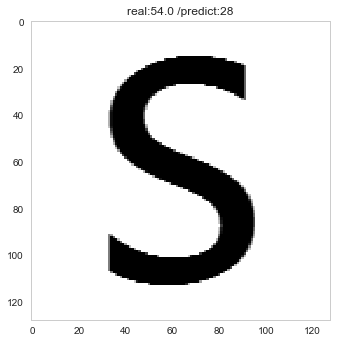

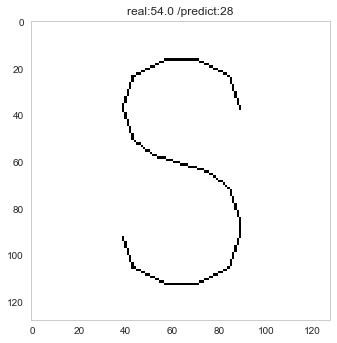

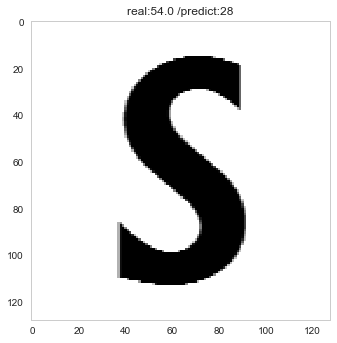

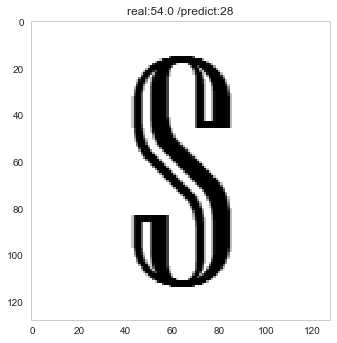

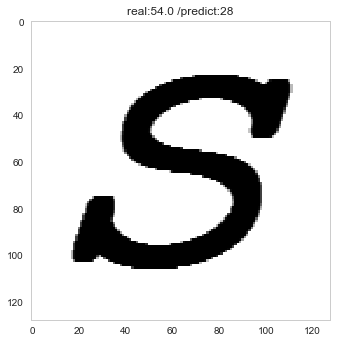

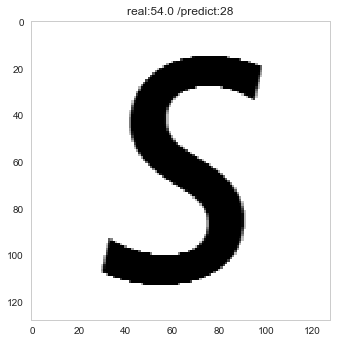

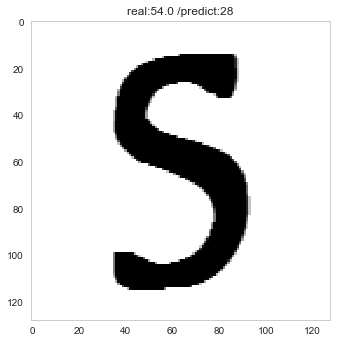

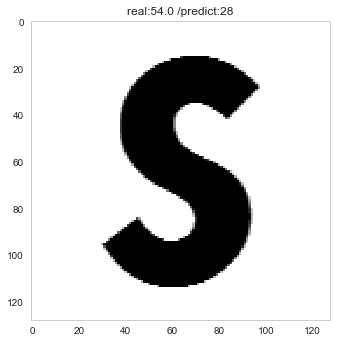

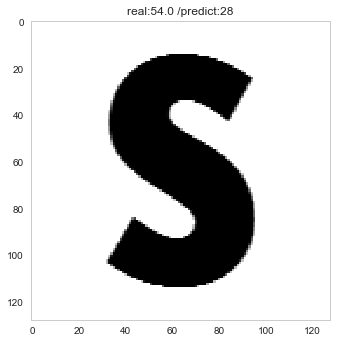

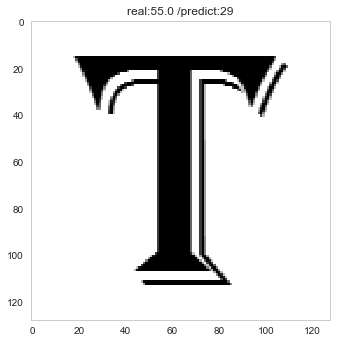

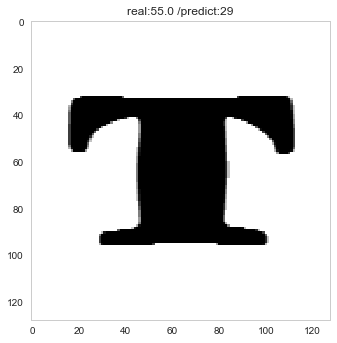

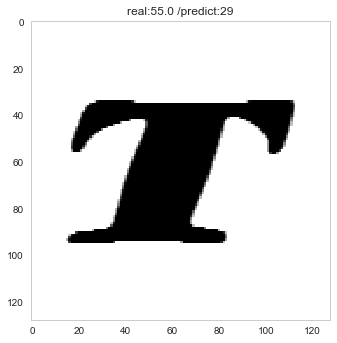

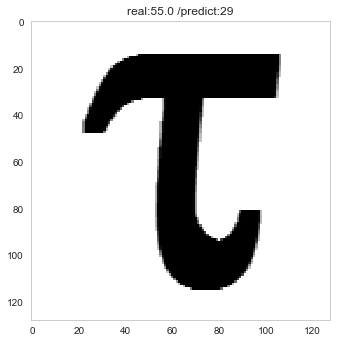

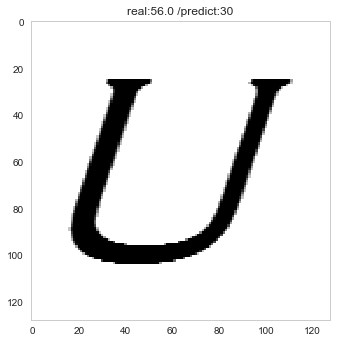

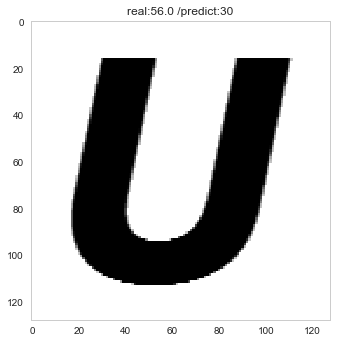

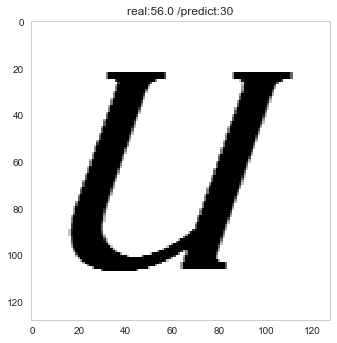

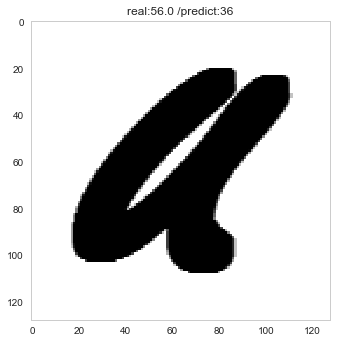

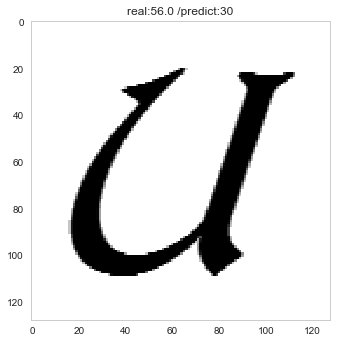

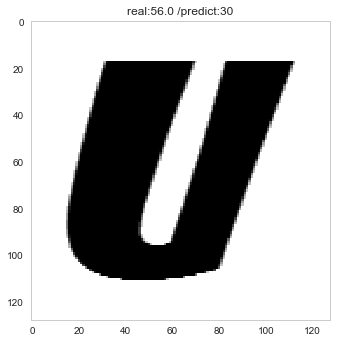

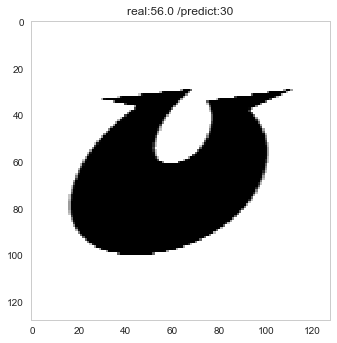

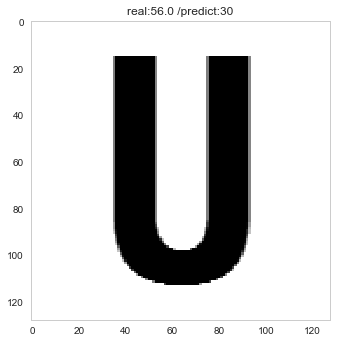

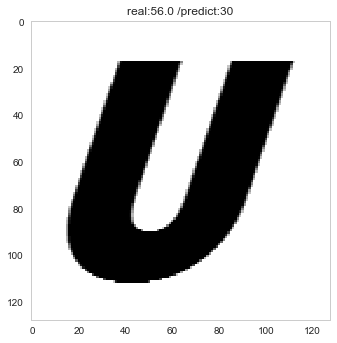

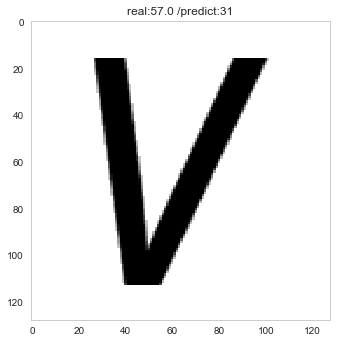

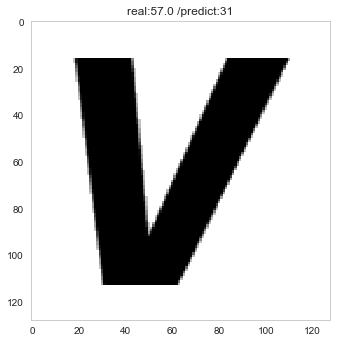

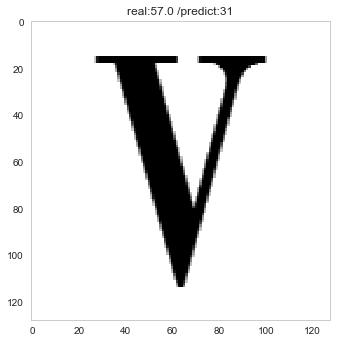

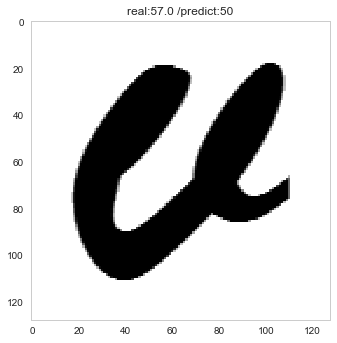

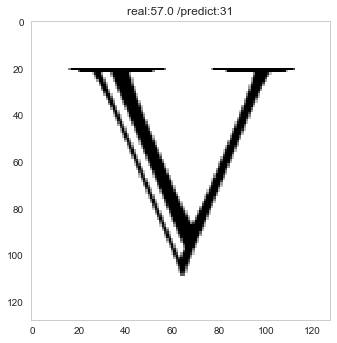

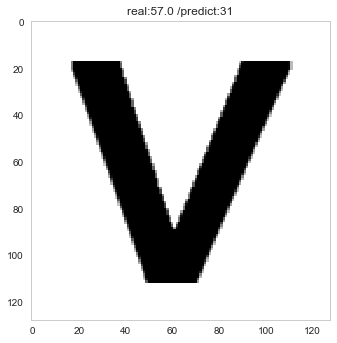

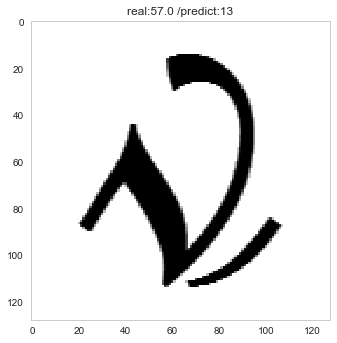

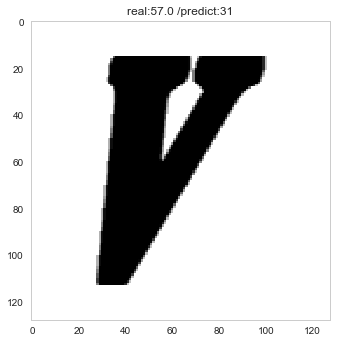

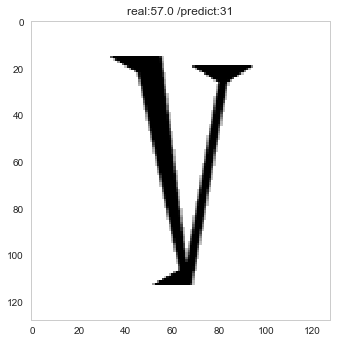

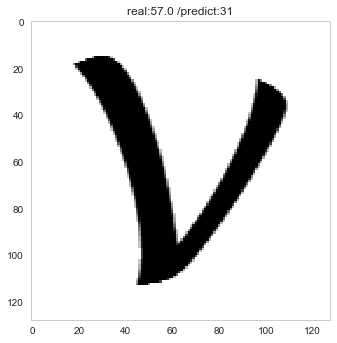

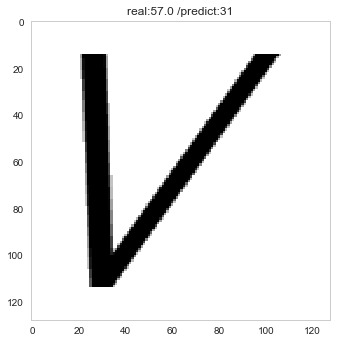

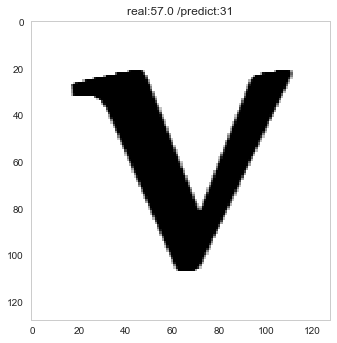

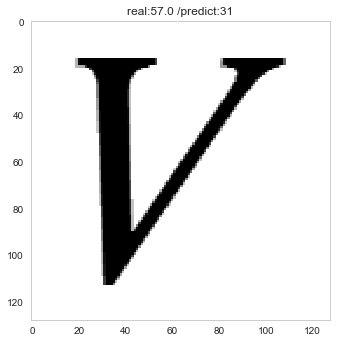

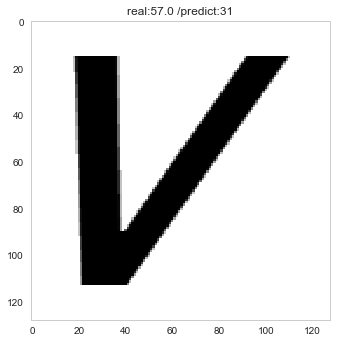

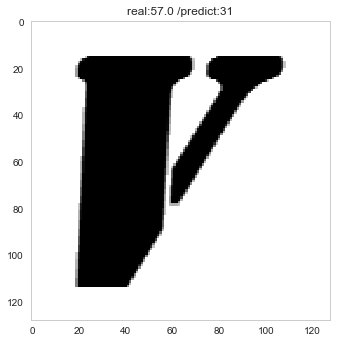

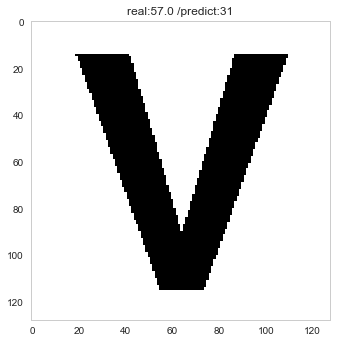

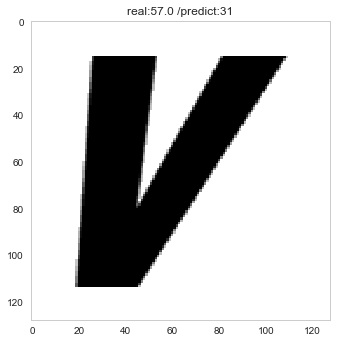

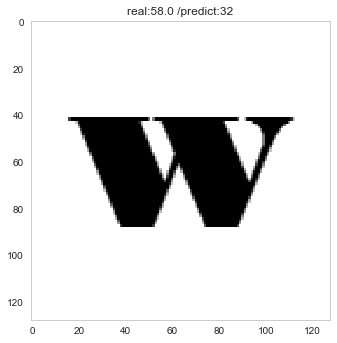

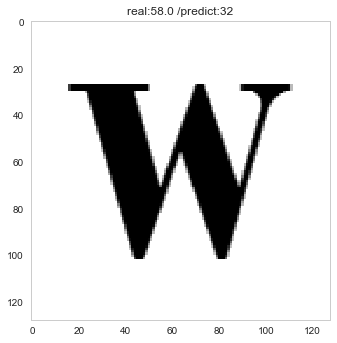

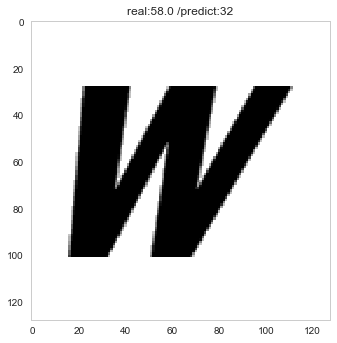

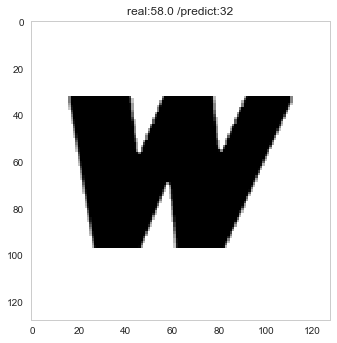

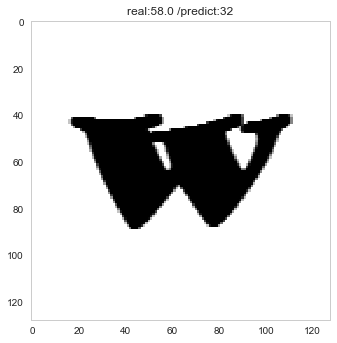

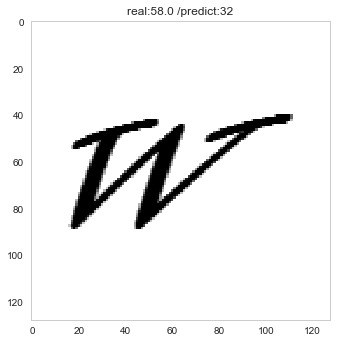

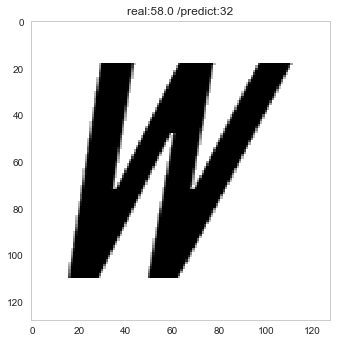

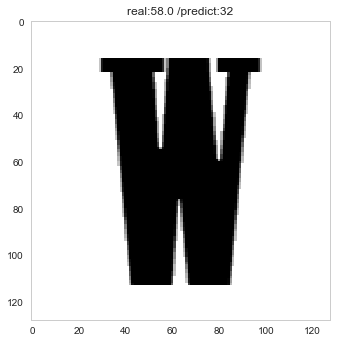

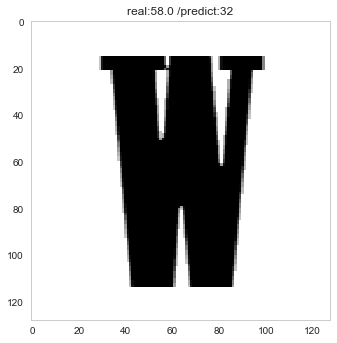

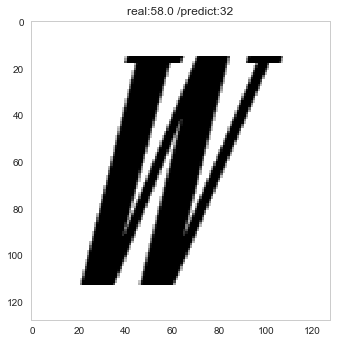

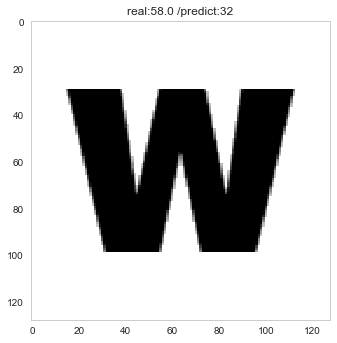

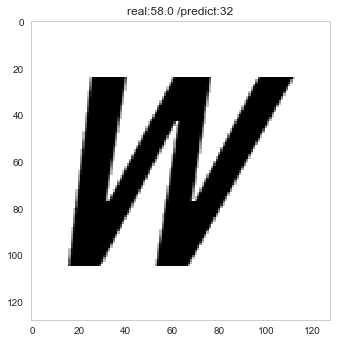

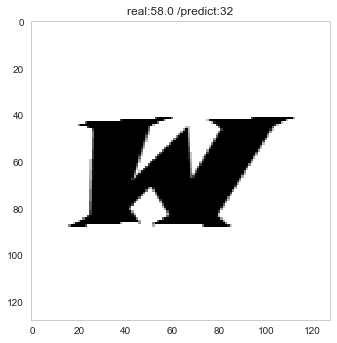

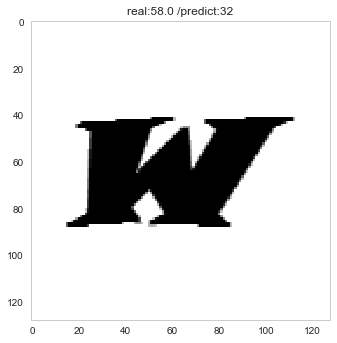

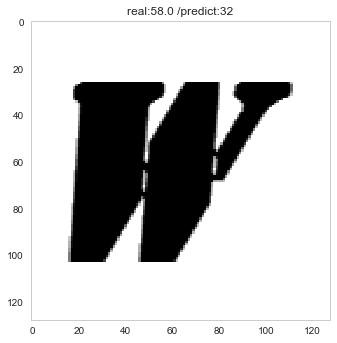

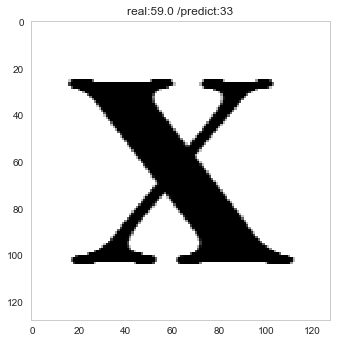

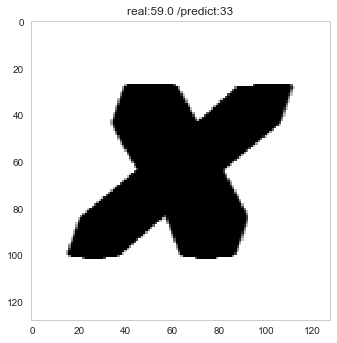

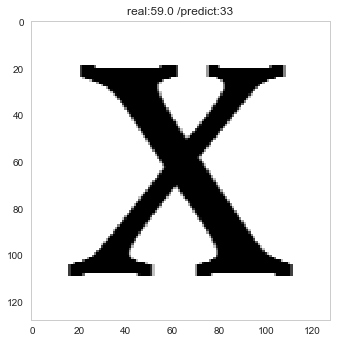

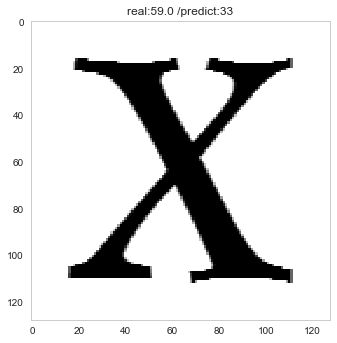

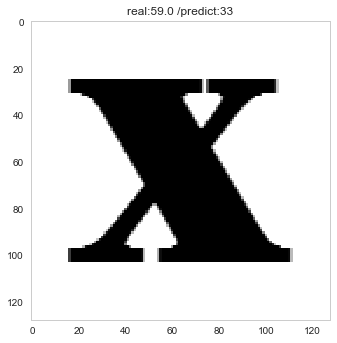

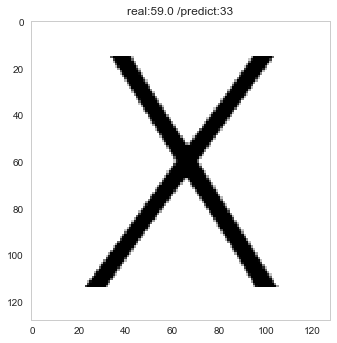

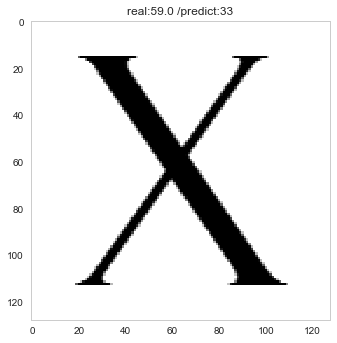

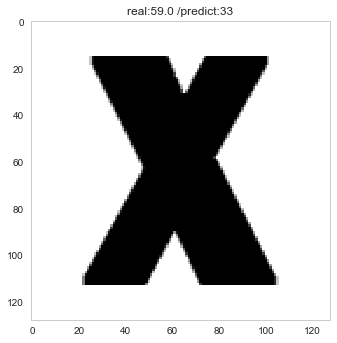

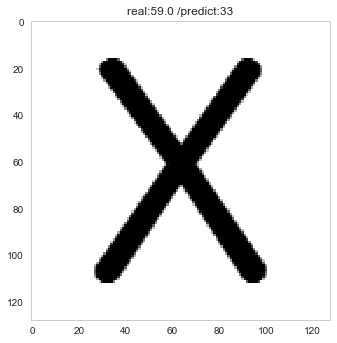

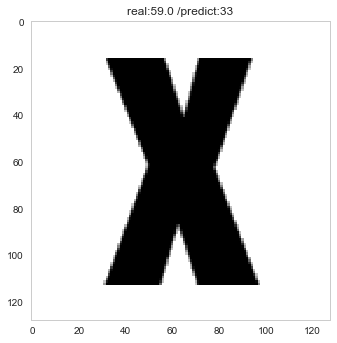

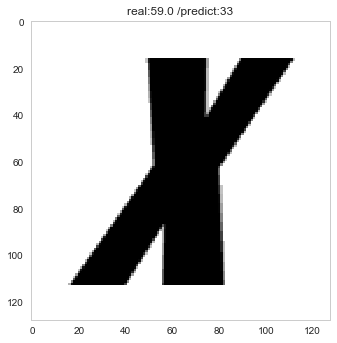

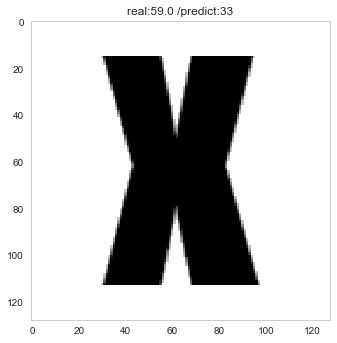

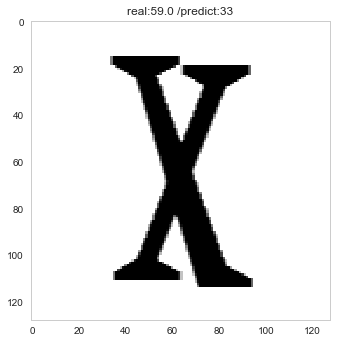

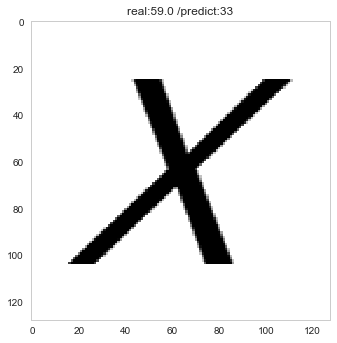

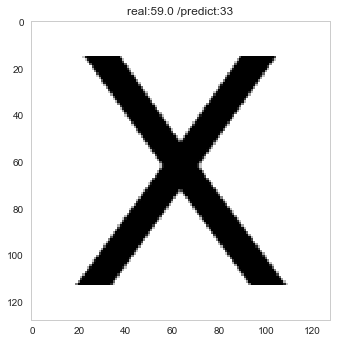

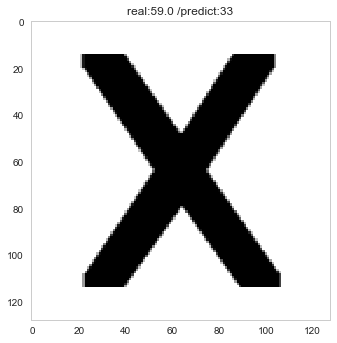

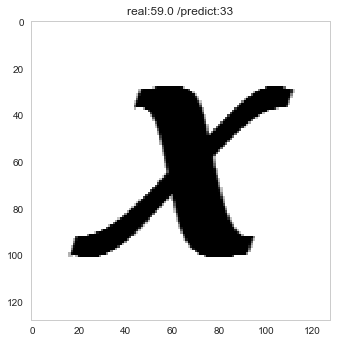

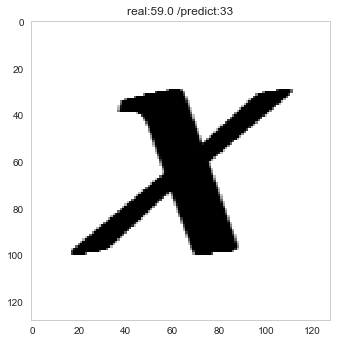

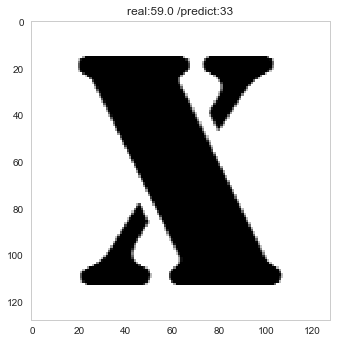

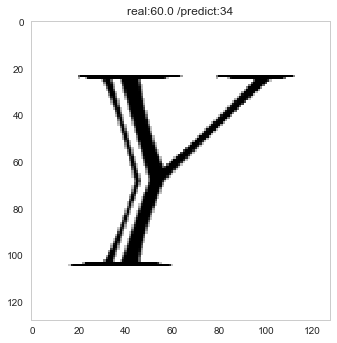

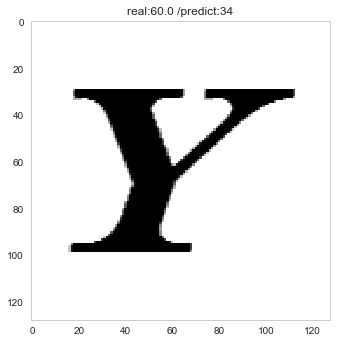

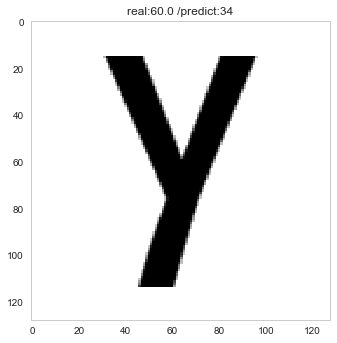

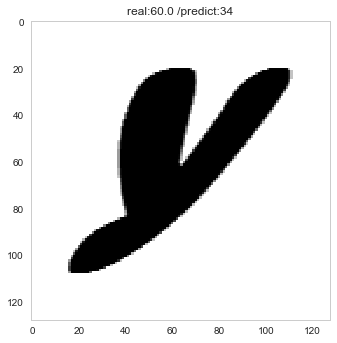

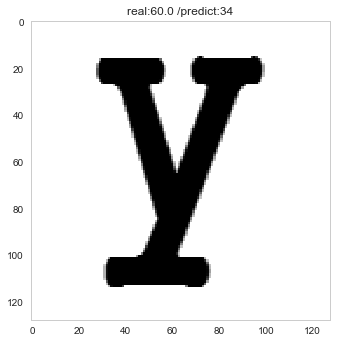

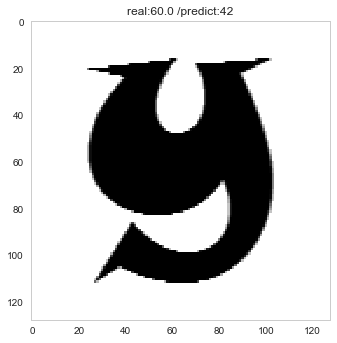

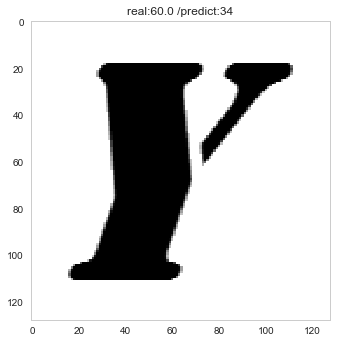

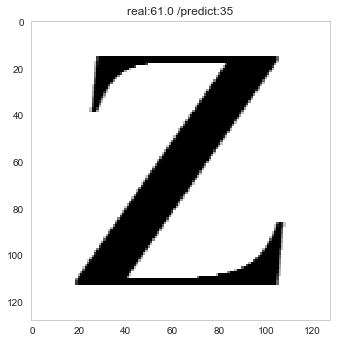

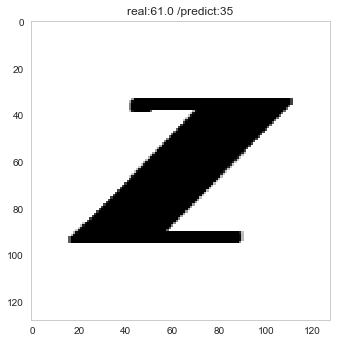

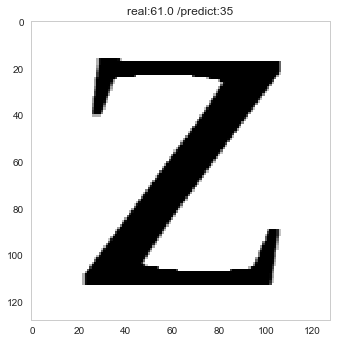

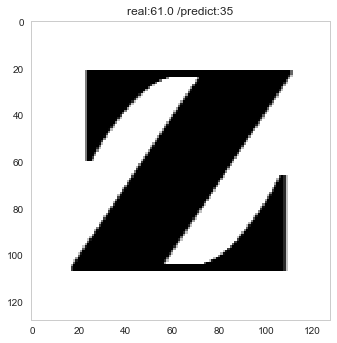

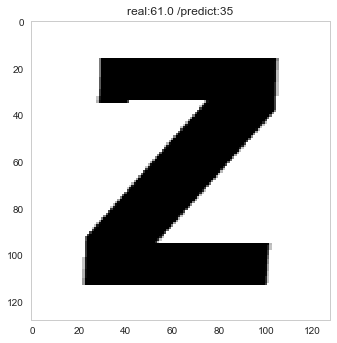

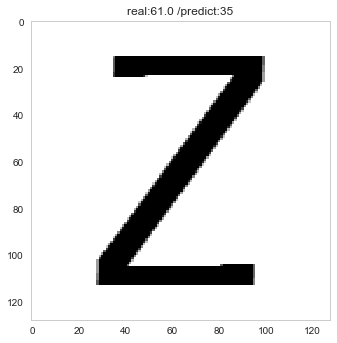

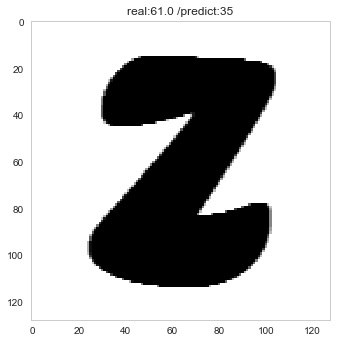

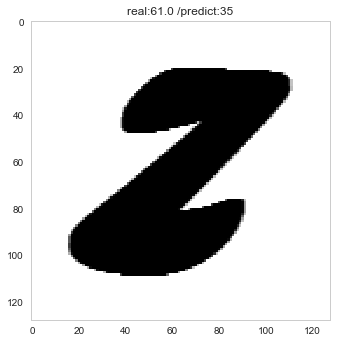

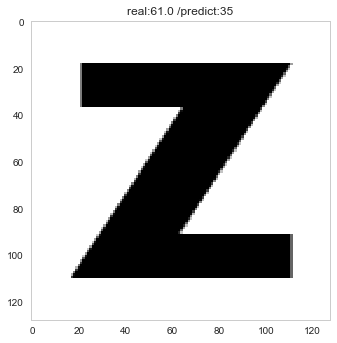

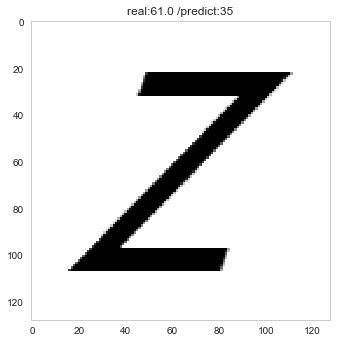

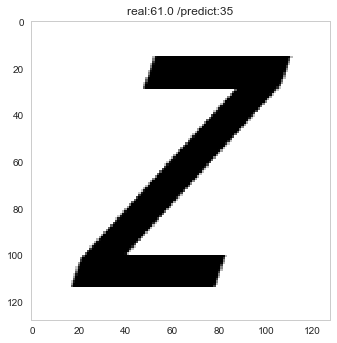

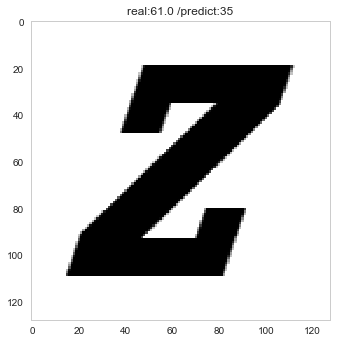

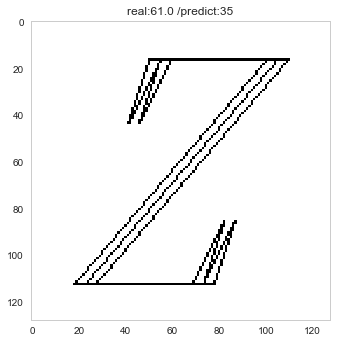

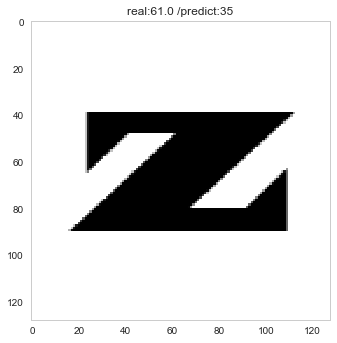

In [18]:
for i in range(len(wrong_label_real)):
    indice = i

    fig = plt.figure()
    plt.title("real:" + str(wrong_label_real[indice]) + " /predict:" + str(wrong_label_predict[indice]))
    plt.imshow(wrong_image[indice].reshape(128,128),cmap ='gray')

## 3. predict test data

#### 3.1 loading data

In [7]:
# read folder
x_pred_path = '../Input/test_set/'

In [8]:
# read images
x_pred=[]
for file in sorted(os.listdir(x_pred_path)):
    x_pred.append(np.expand_dims(mpimg.imread(x_pred_path + file),-1))
x_pred = np.array(x_pred)

####  3.2 predict test data

In [9]:
test_result = model.predict(x_pred)
pred_test_label = np.argmax(test_result,axis=1)

In [30]:
pred_test_label.shape

(18848,)

#### 3.3 write predict result with .txt file

In [31]:
label_name = np.loadtxt("../Input/test.txt", dtype=str)

In [32]:
res = np.concatenate((label_name.reshape(18848,1), pred_test_label.reshape(18848,1)), axis=1)

In [33]:
pd.DataFrame(res).to_csv("../Output/test.txt", header=None, index=None, sep=' ')